## Online Shopper Purchase Prediction & Analysis
1. Get Data
2. Data Exploration & Data pre-processing
3. EDA
4. Model Training and Evaluation
- Logistic Regression
- KNeighborsClassifier
- SVM
- Random Foreast
- AdaBoost
- Decision Tree
- Neural Network
5. Model selection




**1. Get Data**


In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #suppress warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Load Data
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

**Handle missing value**

In [3]:
# Check NA, there is no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Check each columns' unique value
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'bool':
        print("{} values: {}".format(col,df[col].unique()))

Administrative have 27 unique values: int64
Administrative values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration have 3335 unique values: float64
Informational have 17 unique values: int64
Informational values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration have 1258 unique values: float64
ProductRelated have 311 unique values: int64
ProductRelated values: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  8

**Handle duplicated rows**

In [5]:
# Check duplicated rows
print("Numbers of duplicated rows: ", df.duplicated().sum())
# Getting the duplicated rows
row = df.duplicated()
duplicated = df[row]
# Drop duplicated rows
df = df.drop_duplicates()

Numbers of duplicated rows:  125


In [6]:
# Check statistical information
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12205.000000             12205.000000   12205.000000   
mean         2.338878                81.646331       0.508726   
std          3.330436               177.491845       1.275617   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.700000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12205.000000    12205.000000             12205.000000   
mean                34.825454       32.045637              1206.982457   
std                141.424807       44.593649              1919.601400   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        8.000000               193.000000   
50%                  0.000000       18.000000               608.942857   
75%                  0.000000       38.000000              1477.154762   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12205.000000  12205.000000  12205.000000  12205.000000   
mean       0.020370      0.041466      5.949574      0.061942   
std        0.045255      0.046163     18.653671      0.199666   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014231      0.000000      0.000000   
50%        0.002899      0.025000      0.000000      0.000000   
75%        0.016667      0.048529      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12205.000000  12205.000000  12205.000000  12205.000000  
mean           2.124211      2.357804      3.153298      4.073904  
std            0.906823      1.710114      2.402340      4.016654  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [7]:
df.shape

(12205, 18)

1. Dataset Contain 12205 rows and 18 columns
2. Dataset have bool(2), float64(7), int64(7), object(2)
3. Target Variable (Revenue) have bool values, so it is a binary classification problem

In [8]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [9]:
df_copy = df.copy()

**2. Data Exploration**

Target Variable: Revenue

In [ ]:
df['Revenue'].value_counts(normalize=True)

False    0.843671
True     0.156329
Name: Revenue, dtype: float64

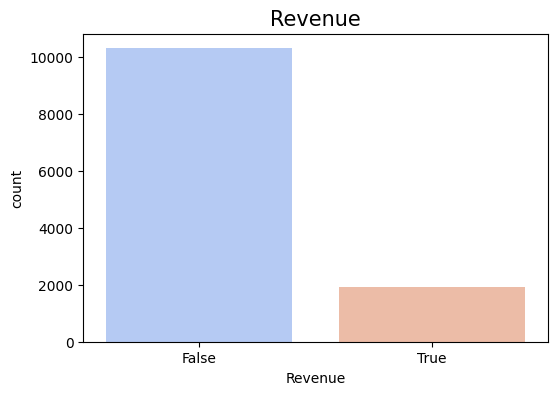

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x = df['Revenue'], palette='coolwarm')
plt.title('Revenue', fontsize = 15)
plt.show()

There are 84% of values in Reveue is false.

Feature Variable:


*   For variables "Operating System", "Browser", and "Region", the data type of these variables in initial dataframe is numeric, which I cannot give proper opinion and analysis of the data. For example, the operating system only have group 1 to 8, but we don't know what is "1" stand for. Therefore, I google top list for Operating system, Browser and Region to replace the value with numerical values.




In [ ]:
# change Opearting system value from numerical to caterogical
# Data is take from Google.
df.loc[df['OperatingSystems'] == 1,'OperatingSystems'] = 'IOS'
df.loc[df['OperatingSystems'] == 2,'OperatingSystems'] = 'Windows10'
df.loc[df['OperatingSystems'] == 3,'OperatingSystems'] = 'Windows11'
df.loc[df['OperatingSystems'] == 4,'OperatingSystems'] = 'ChromeOS'
df.loc[df['OperatingSystems'] == 5,'OperatingSystems'] = 'macOSSierra'
df.loc[df['OperatingSystems'] == 6,'OperatingSystems'] = 'Android'
df.loc[df['OperatingSystems'] == 7,'OperatingSystems'] = 'Windows7'
df.loc[df['OperatingSystems'] == 8,'OperatingSystems'] = 'Linux'

In [ ]:
# change Browser value from numerical to caterogical
# Data is take from Google. Top list of browser.
df.loc[df['Browser'] == 1,'Browser'] = 'Firefox'
df.loc[df['Browser'] == 2,'Browser'] = 'GoogleChrome'
df.loc[df['Browser'] == 3,'Browser'] = 'MicrosoftEdge'
df.loc[df['Browser'] == 4,'Browser'] = 'AppleSafari'
df.loc[df['Browser'] == 5,'Browser'] = 'Opera'
df.loc[df['Browser'] == 6,'Browser'] = 'Brave'
df.loc[df['Browser'] == 7,'Browser'] = 'UCBrowser'
df.loc[df['Browser'] == 8,'Browser'] = 'Vivaldi'
df.loc[df['Browser'] == 9,'Browser'] = 'DuckDuckgo'
df.loc[df['Browser'] == 10,'Browser'] = 'Chromium'
df.loc[df['Browser'] == 11,'Browser'] = 'Epic'
df.loc[df['Browser'] == 12,'Browser'] = 'TorBrowser'
df.loc[df['Browser'] == 13,'Browser'] = 'Maxthon'

In [ ]:
# change Region value from numerical to caterogical
# Data is take from Google. Top 10 country where internet is used most.
df.loc[df['Region'] == 1,'Region'] = 'China'
df.loc[df['Region'] == 2,'Region'] = 'Indonesia'
df.loc[df['Region'] == 3,'Region'] = 'India'
df.loc[df['Region'] == 4,'Region'] = 'United States'
df.loc[df['Region'] == 5,'Region'] = 'Brazil'
df.loc[df['Region'] == 6,'Region'] = 'Nigeria'
df.loc[df['Region'] == 7,'Region'] = 'Japan'
df.loc[df['Region'] == 8,'Region'] = 'Russia'
df.loc[df['Region'] == 9,'Region'] = 'Bangladesh'

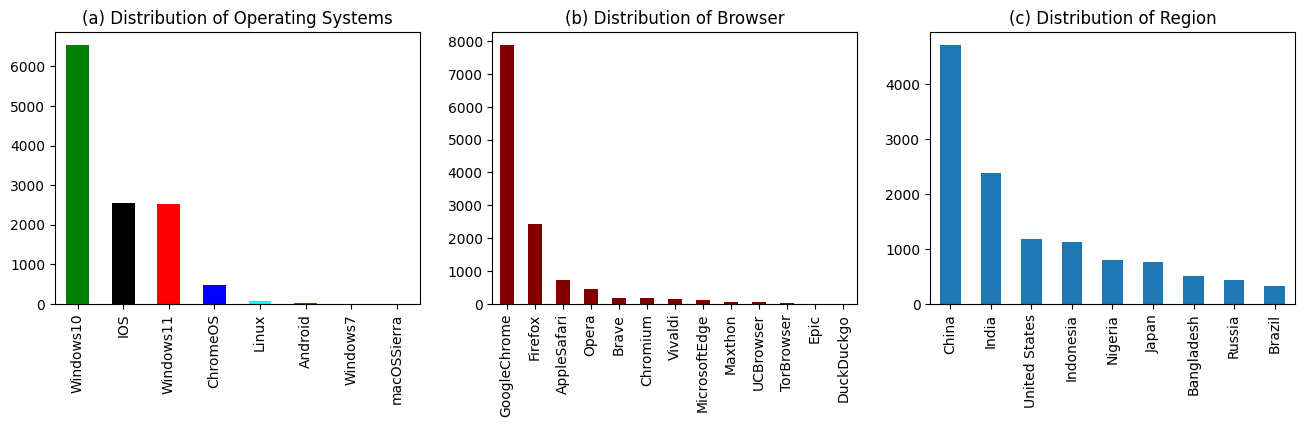

In [ ]:
# Create bar chart to show the distribution of 'OperatingSystems','Browser',
# and 'Region'
plt.figure(1)
plt.subplot(331)
df['OperatingSystems'].value_counts().plot.bar(figsize=(16,12), title= '(a) Distribution of Operating Systems', color=['green', 'black', 'red', 'blue', 'cyan'])

plt.subplot(332)
df['Browser'].value_counts().plot.bar(title= '(b) Distribution of Browser', color='maroon')

plt.subplot(333)
df['Region'].value_counts().plot.bar(title= '(c) Distribution of Region')

plt.show()

1. Best Operating System is Windows10, IOS, and Windows11.
2. Google Chrome is the most popular browser.
3. China and India have more than half of the total population in this dataset.

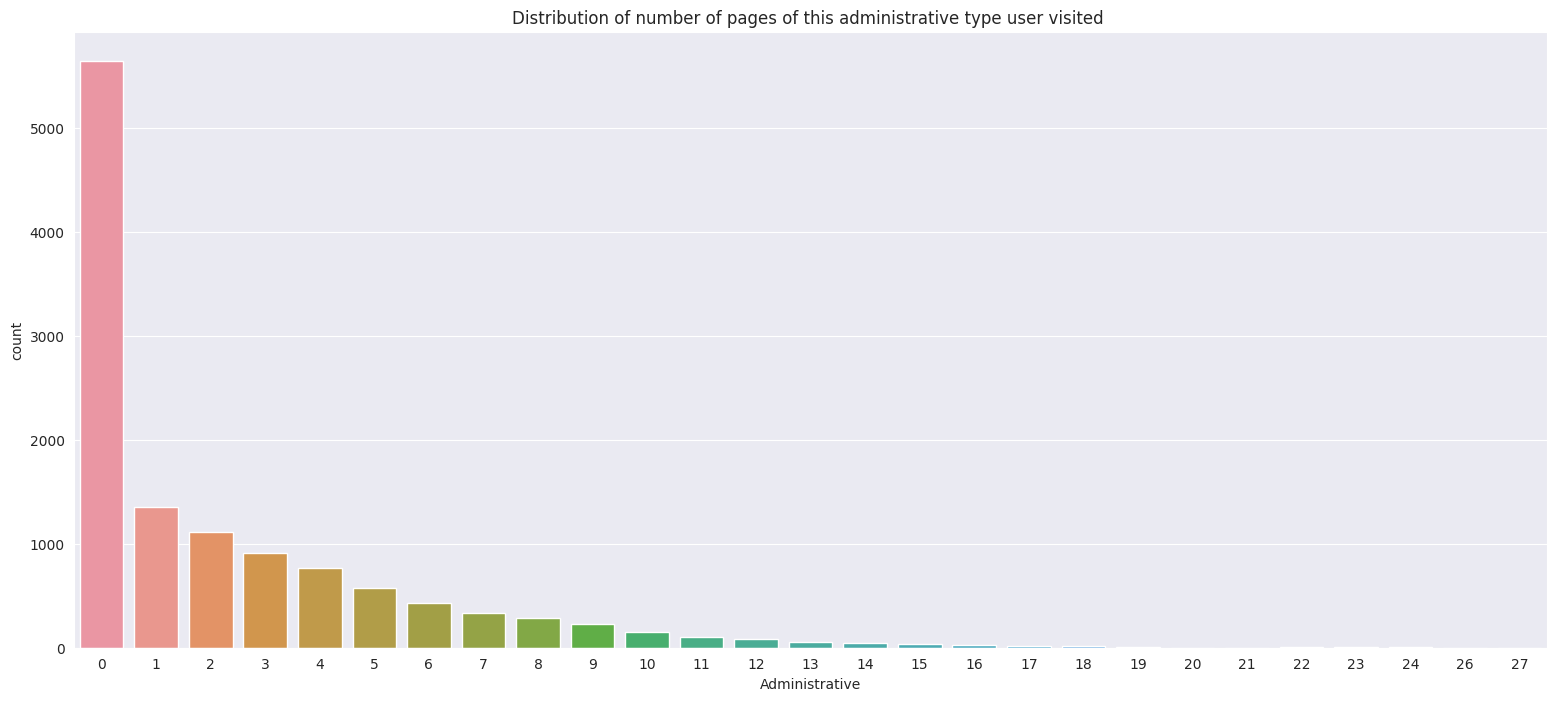

In [ ]:
# Check distribution of 'Administrative'
sns.set_style('darkgrid')
plt.figure(figsize = (19,8))
plt.title('Distribution of number of pages of this administrative type user visited ')
sns.countplot(x = df['Administrative'])
plt.show()

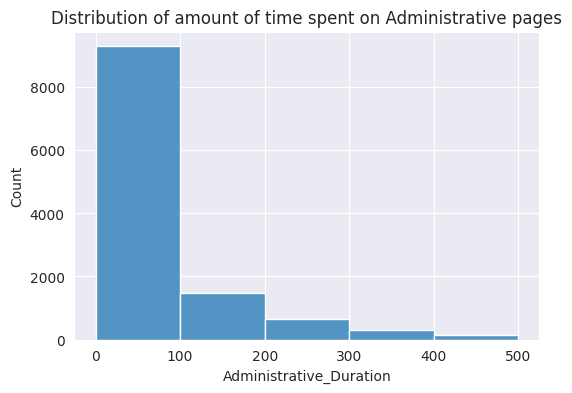

In [ ]:
# Check distribution of 'Administrative_Duration'
plt.figure(figsize=(6,4))
sns.histplot(df['Administrative_Duration'], bins = [0,100,200,300,400,500])
plt.title('Distribution of amount of time spent on Administrative pages')
plt.show()

<Axes: title={'center': 'Distribution of number of pages of this informational type user visited '}, xlabel='Informational', ylabel='count'>

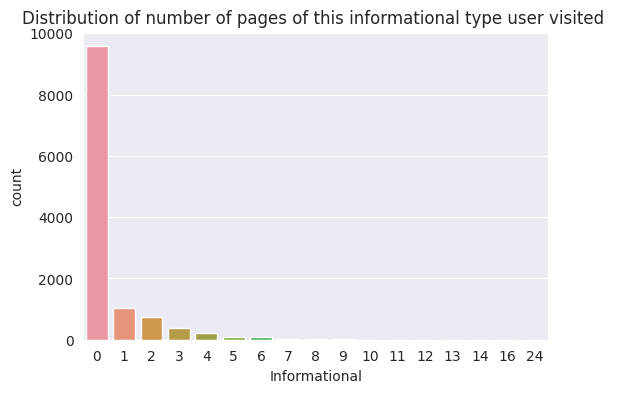

In [ ]:
# Check distribution of 'Informational'
plt.figure(figsize = (6,4))
plt.title('Distribution of number of pages of this informational type user visited ')
sns.countplot(x = df['Informational'])

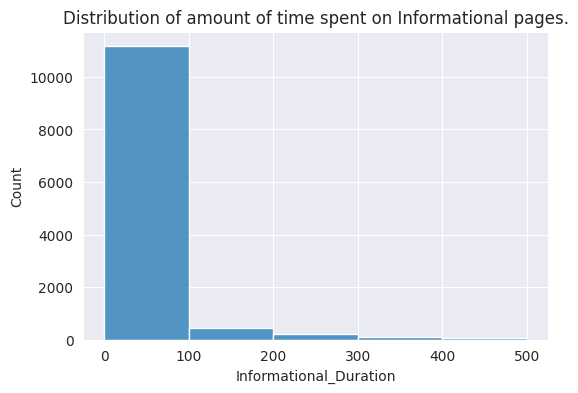

In [ ]:
## Check distribution of 'Informational_Duration'
plt.figure(figsize=(6,4))
sns.histplot(df['Informational_Duration'], bins = [0,100,200,300,400,500])
plt.title('Distribution of amount of time spent on Informational pages.')
plt.show()

<Axes: title={'center': 'Distribution of Traffic Type '}, xlabel='TrafficType', ylabel='count'>

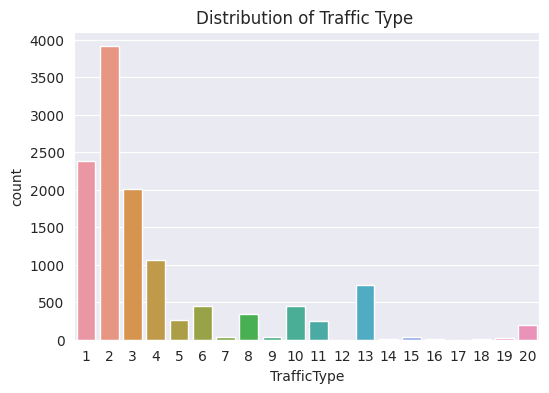

In [ ]:
# Check distribution of 'TrafficType'
plt.figure(figsize = (6,4))
plt.title('Distribution of Traffic Type ')
sns.countplot(x = df['TrafficType'])

<Axes: title={'center': 'Distribution of Special Day '}, xlabel='SpecialDay', ylabel='count'>

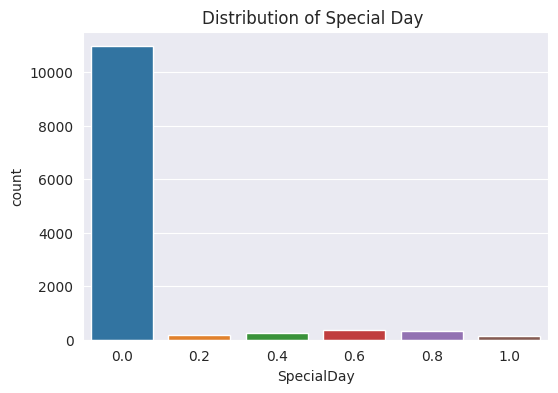

In [ ]:
# Check distribution of 'SpecialDay'
plt.figure(figsize = (6,4))
plt.title('Distribution of Special Day ')
sns.countplot(x = df['SpecialDay'])

<Axes: title={'center': 'Weekend'}>

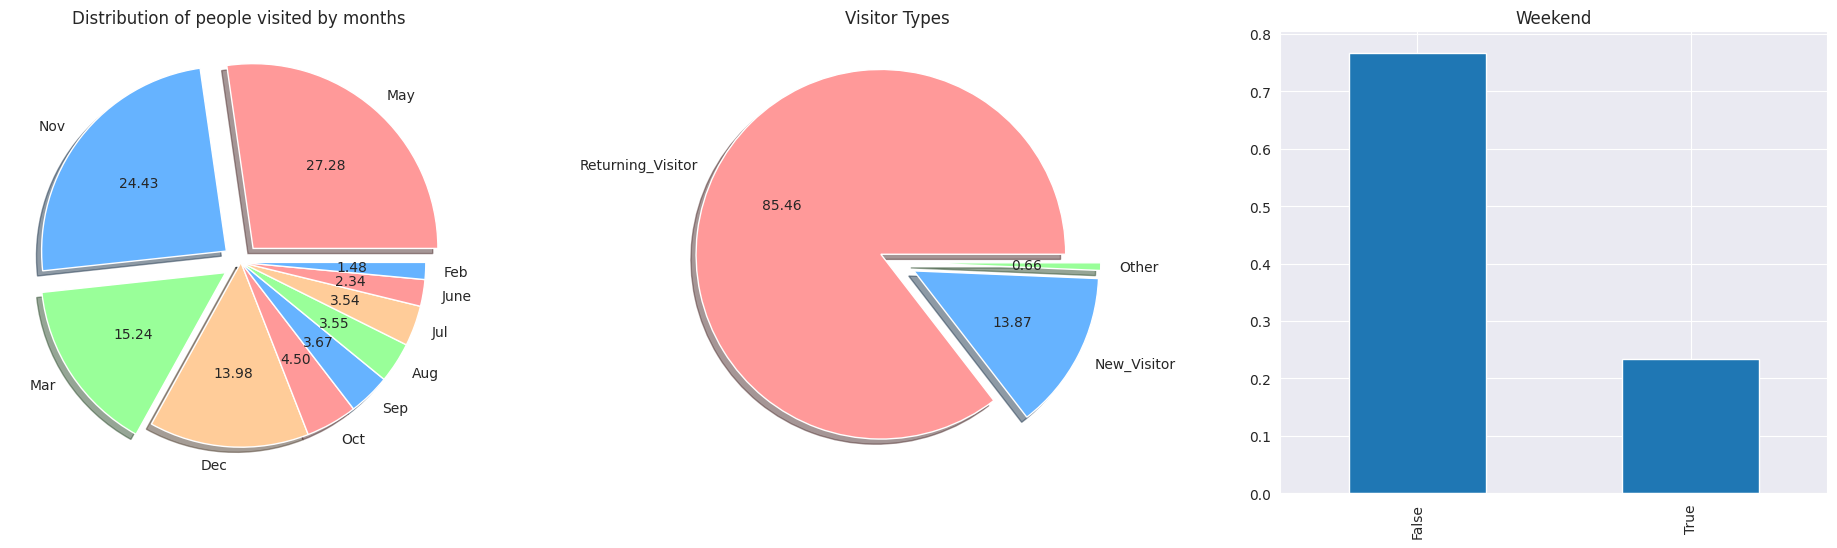

In [ ]:
# Distribution of variable 'Month', 'VisitorType', and 'Weekend'
plt.figure(1)
plt.subplot(131)
plt.title('Distribution of people visited by months ')
plt.pie(x = df['Month'].value_counts(),
       labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
       autopct='%.2f',
       colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
       shadow = True,
       explode = (0.1,0.1,0.1,0,0,0,0,0,0,0))

plt.subplot(132)
plt.title('Visitor Types')
plt.pie(x = df['VisitorType'].value_counts(),
       labels =['Returning_Visitor', 'New_Visitor', 'Other'] ,
       autopct='%.2f',
       colors=['#ff9999','#66b3ff','#99ff99'],
       shadow = True,
       explode = (0.1,0.1,0.1))


plt.subplot(133)
df['Weekend'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Weekend')

1. May and Nov months have more visitor compare to other months
2. On website people visit more and more so dataset contain more returning visitor
3. People usually visit site in non-weekend days

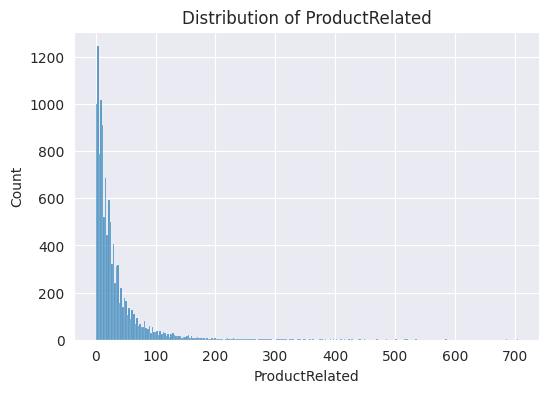

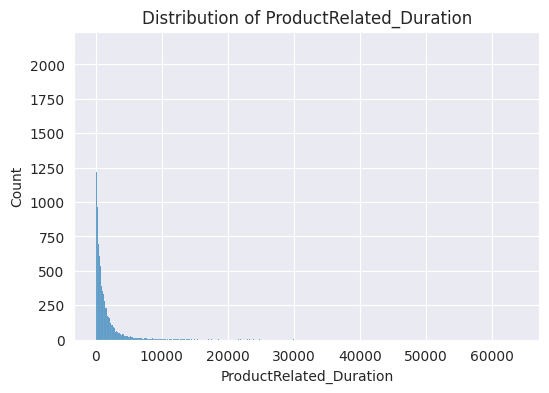

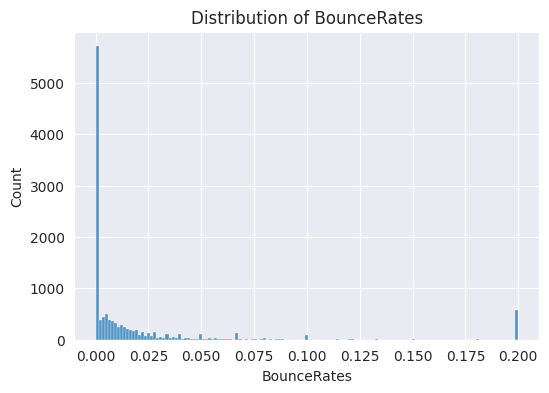

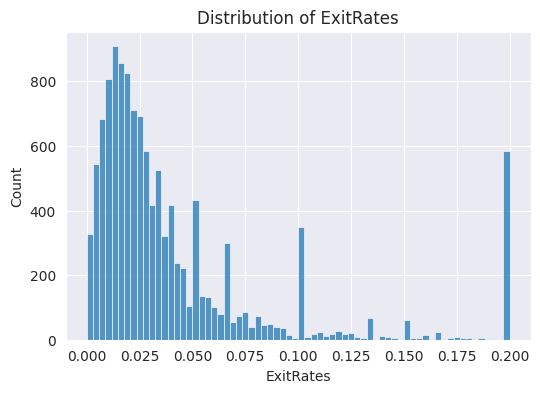

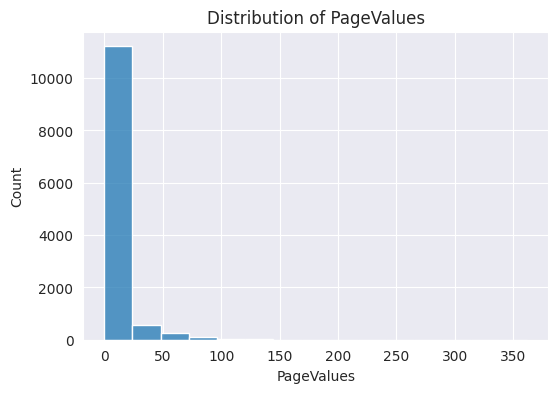

In [ ]:
# Distribution of continous variable
# 'ProductRelated','ProductRelated_Duration',
# 'BounceRates', 'ExitRates' ,'PageValues'
continous_clm = ['ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates' ,'PageValues' ]
for i in continous_clm:
        plt.figure(figsize=(6,4))
        sns.histplot(df[i])
        plt.title('Distribution of {}'.format(i))
        plt.show()

**3. EDA [Exploratory Data Analysis]**

1. Check the correlation

<ipython-input-165-bd6244f3d5d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()
<ipython-input-165-bd6244f3d5d7>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(data_corr,dtype=np.bool))


<Axes: >

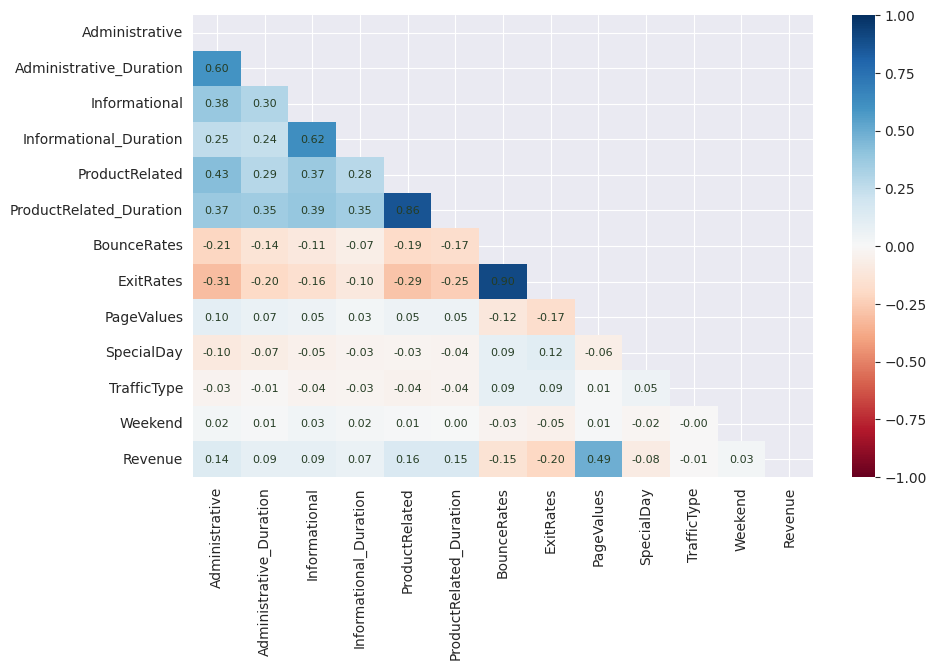

In [ ]:
data_corr = df.corr()

plt.figure(figsize=(10, 6),dpi=100)
sns.heatmap(data= data_corr,
            vmin= -1,
            vmax= 1.0,
            cmap= 'RdBu',
            annot=True,
            fmt=".2f",
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(data_corr,dtype=np.bool))
           )

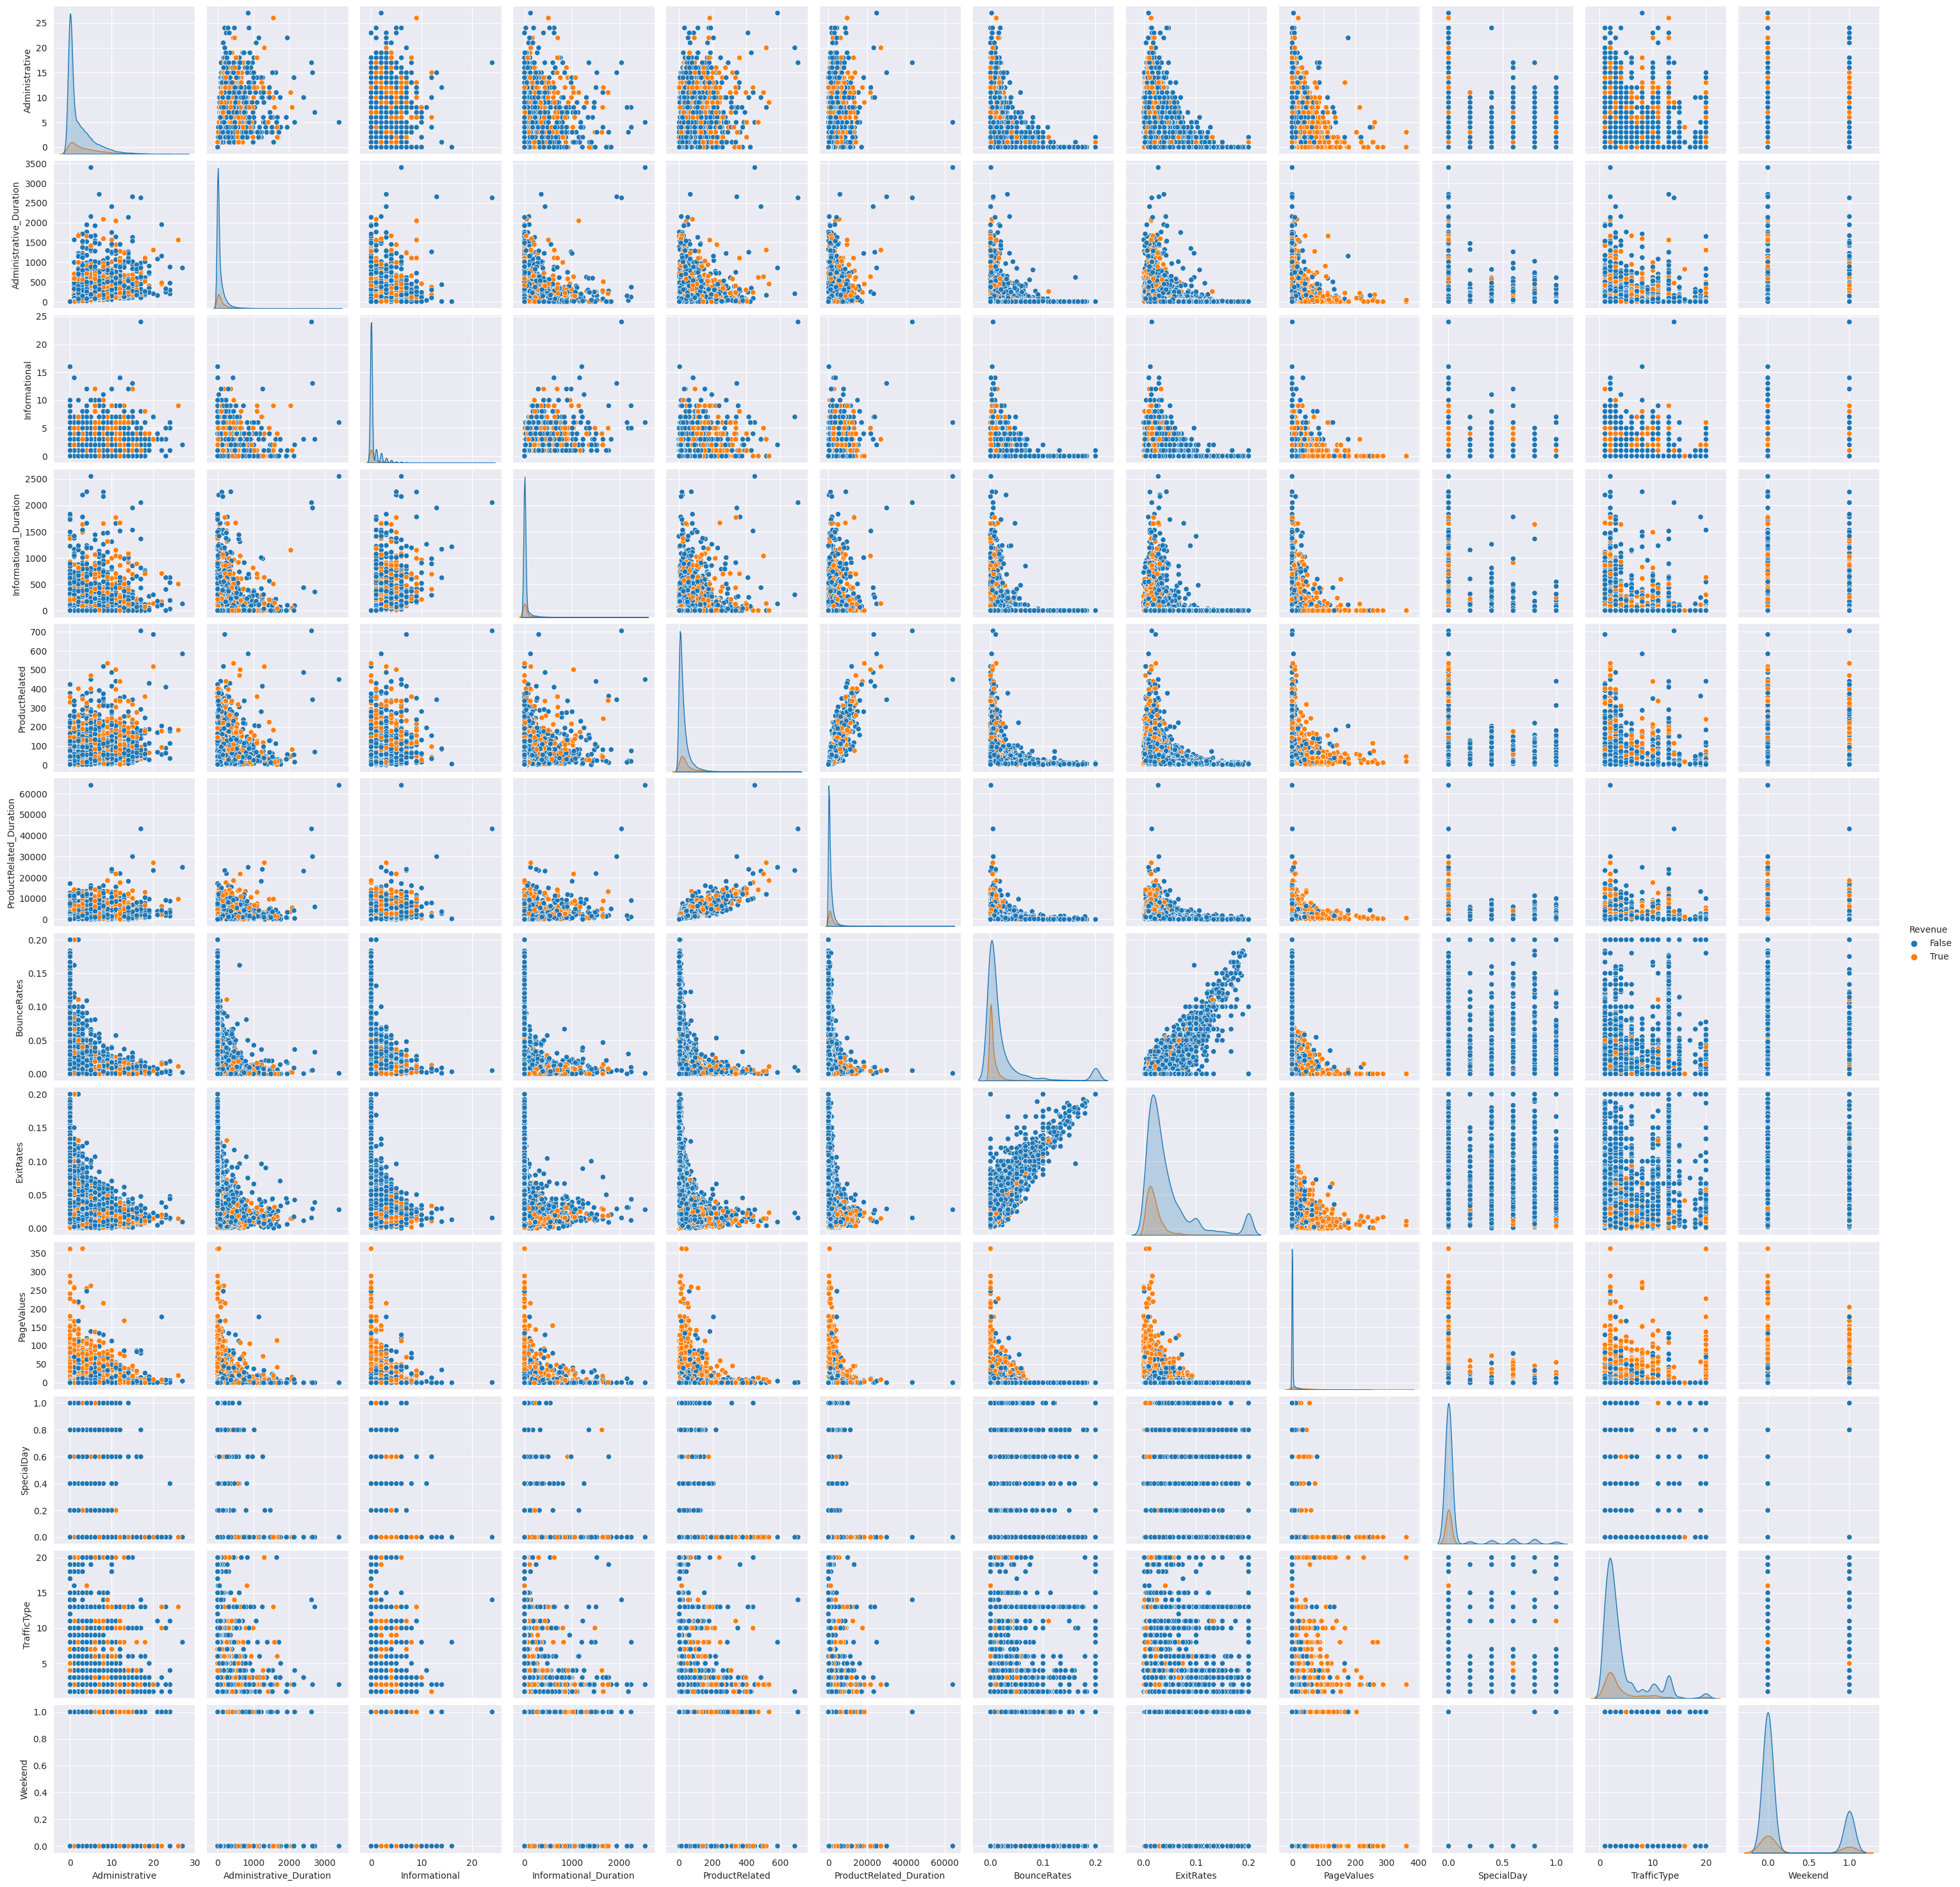

In [ ]:
sns.pairplot(data=df,hue='Revenue')

The Revenue increases with most of the parameters. This maybe because this more the number of searches or users visited more will be the revenue collected

2. Relationship of 'Month' and 'Revenue'

Text(0.5, 1.0, 'Informational_Duration in different month by Revenue')

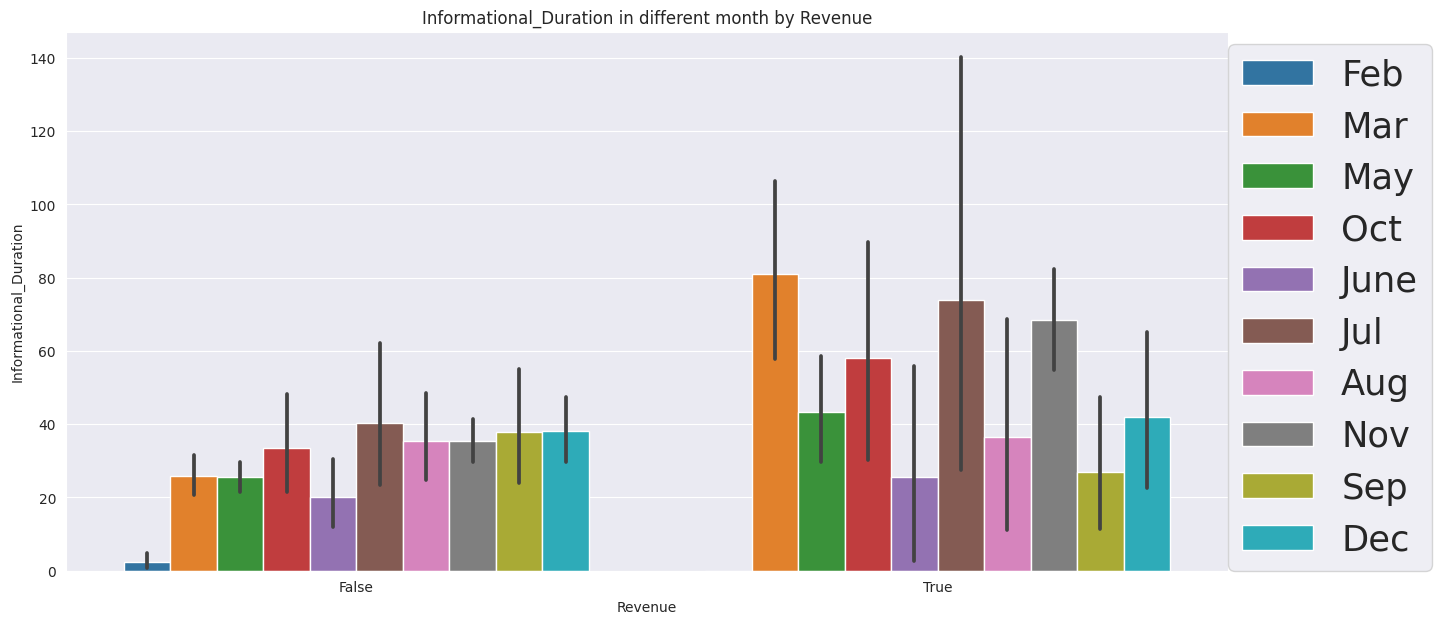

In [ ]:
# Informational_Duration, Revenue and Month
plt.figure(figsize=(15,7))
sns.barplot(y='Informational_Duration',x='Revenue',data=df,hue='Month')
plt.legend(loc=(1,0),prop={'size':25.4})
plt.title('Informational_Duration in different month by Revenue')

1. Revenue is high for informational searches, especially in the month of March and July.
2. In October and November, the revenue is also high, this maybe becuase these two months closed to 'Black Friday'.

Text(0.5, 1.0, 'Administrative_Duration in different month by Revenue')

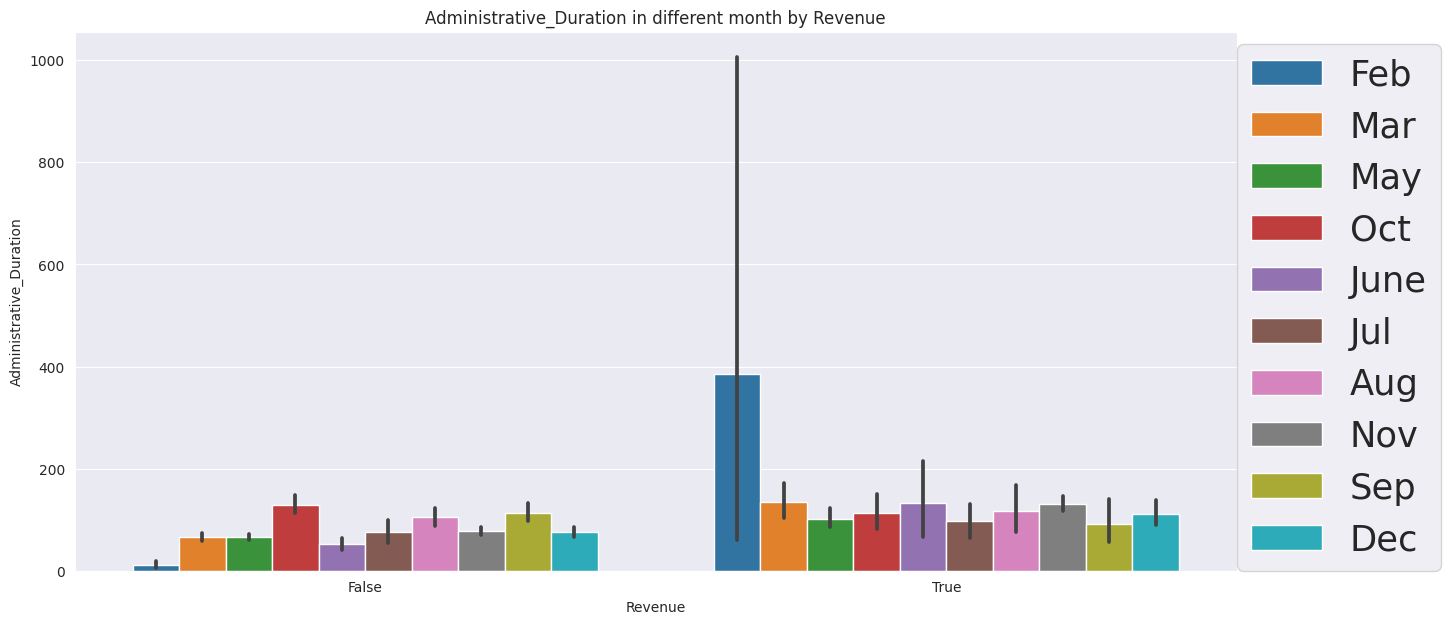

In [ ]:
# Administrative_Duration, Revenue and Month
plt.figure(figsize=(15,7))
sns.barplot(y='Administrative_Duration',x='Revenue',data=df,hue='Month')
plt.legend(loc=(1,0),prop={'size':25.4})
plt.title('Administrative_Duration in different month by Revenue')

In Feburary, the duration of administrative searches are huge compared other months.

3. Relationship of 'Month' and 'Revenue' by 'VisitorType'

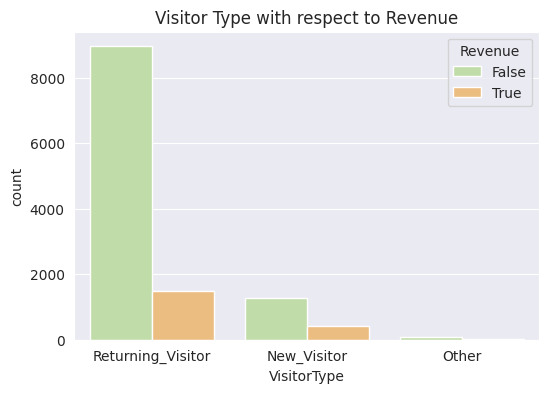

In [ ]:
plt.figure(figsize = (6,4))
plt.title('Visitor Type with respect to Revenue')
sns.countplot(x= 'VisitorType', hue = 'Revenue', data = df, palette='Spectral_r')
plt.show()

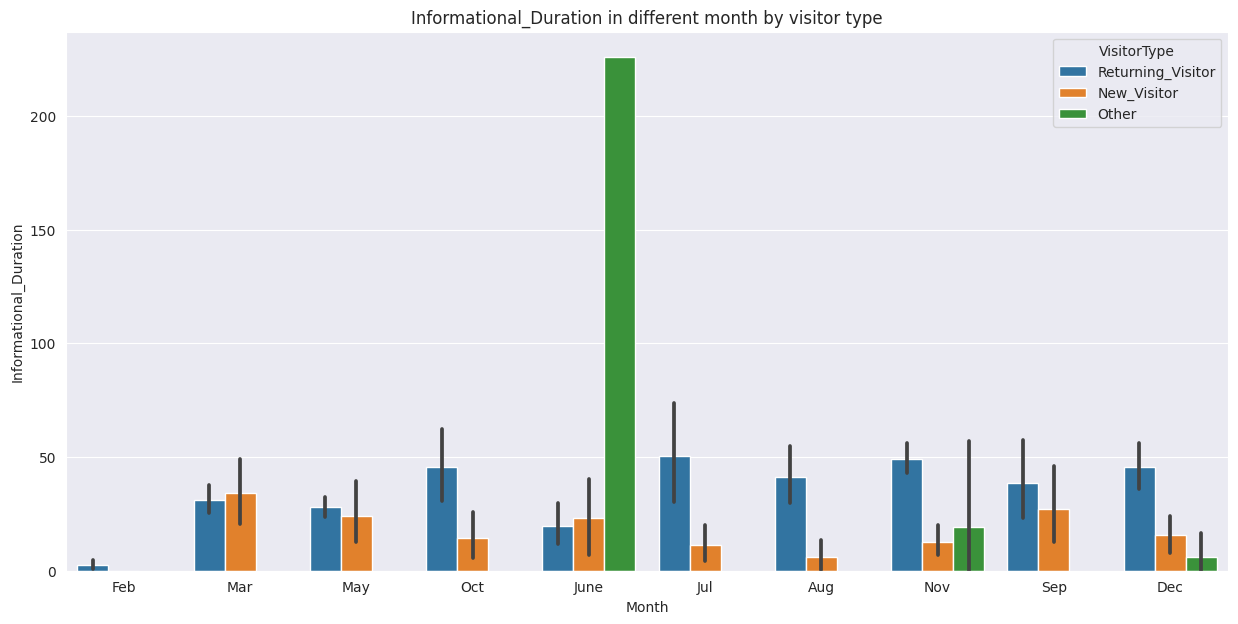

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y='Informational_Duration',x='Month',data=df,hue='VisitorType')
plt.title('Informational_Duration in different month by visitor type')
plt.show()

The proportion of returning custormers are higher in July, August and November.

3. Check relationship among geographic, visitor behavior and purchase intention

Text(0.5, 1.0, 'Informational_Duration in different regions by Revenue')

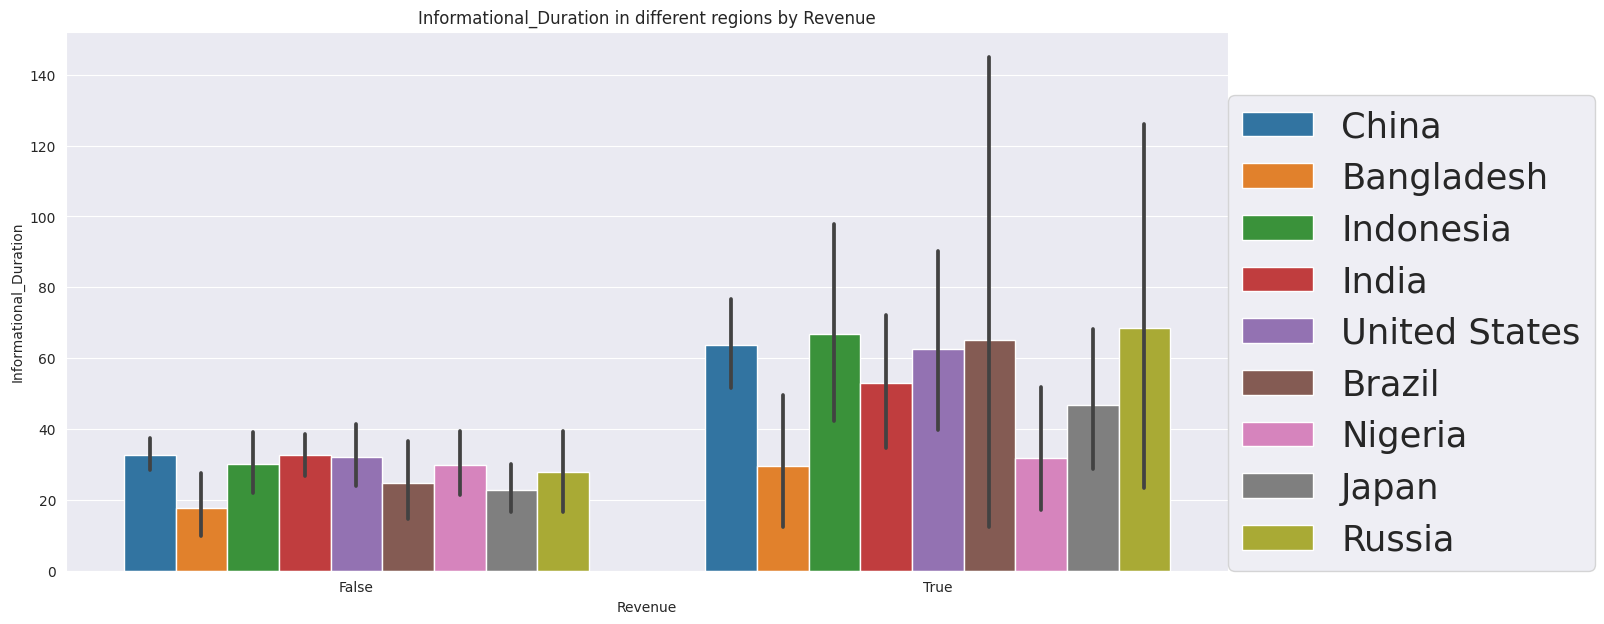

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y='Informational_Duration',x='Revenue',data=df,hue='Region')
plt.legend(loc=(1,0),prop={'size':25.4})
plt.title('Informational_Duration in different regions by Revenue')

Text(0.5, 1.0, 'Administrative_Duration in different regions by Revenue')

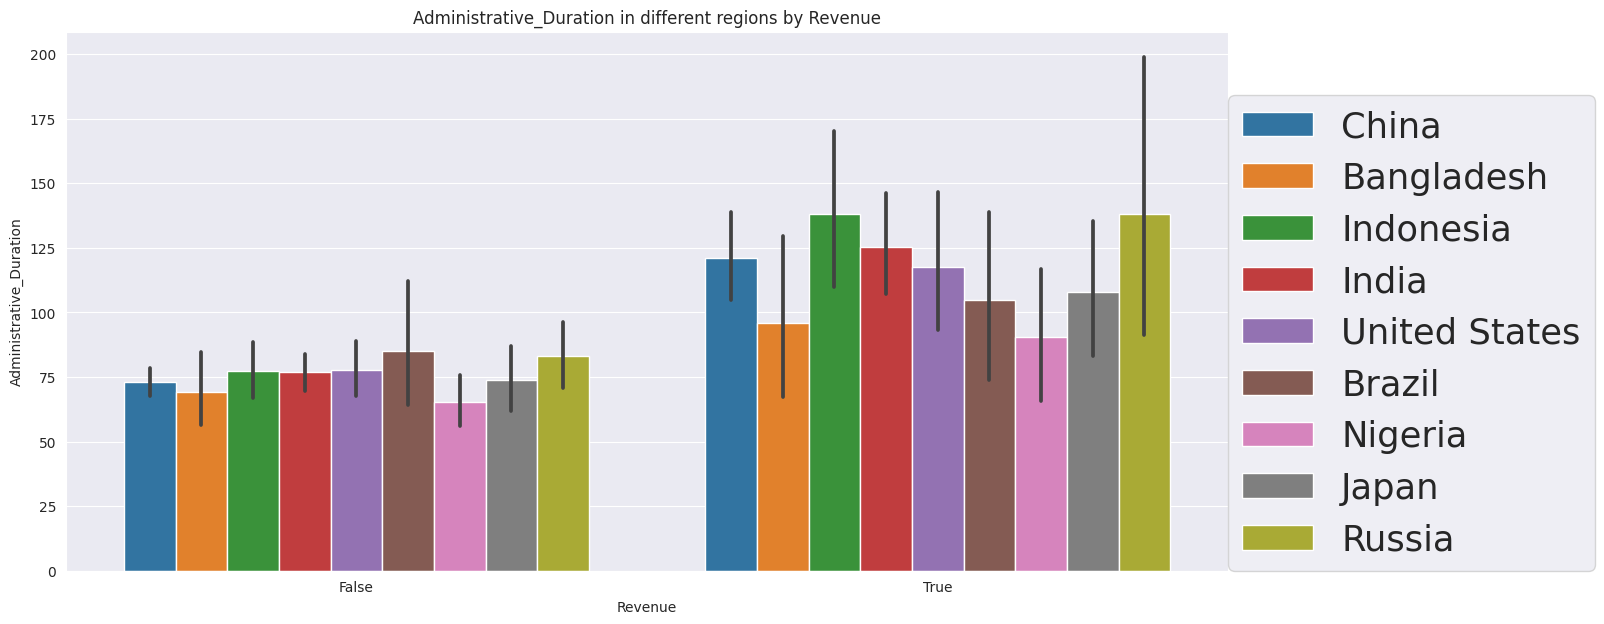

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y='Administrative_Duration',x='Revenue',data=df,hue='Region')
plt.legend(loc=(1,0),prop={'size':25.4})
plt.title('Administrative_Duration in different regions by Revenue')

Revenue is high for administrative searches in Indonesia and Russia.

**5. Model Training and Evaluation**

**Handle outlier**

In [10]:
# Check outlier
df1 = df_copy.select_dtypes(exclude = [object, bool])
df1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
dtype: object

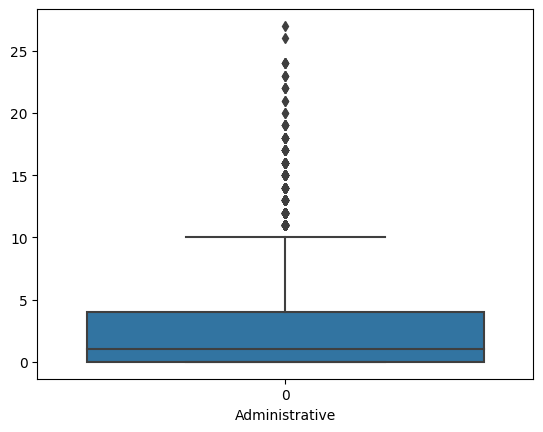

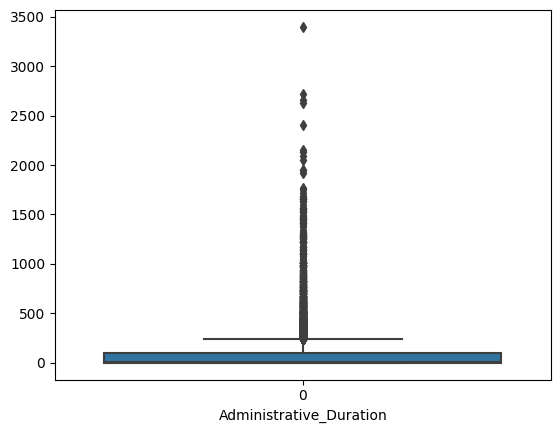

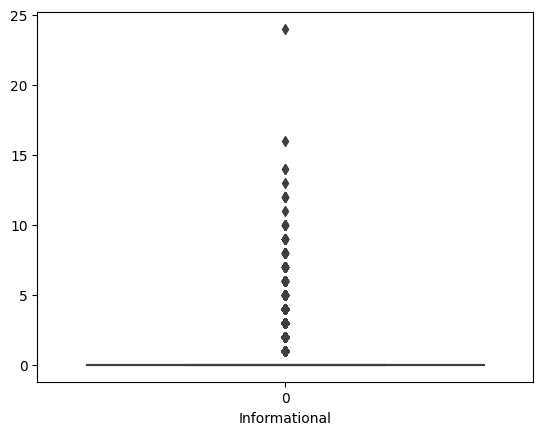

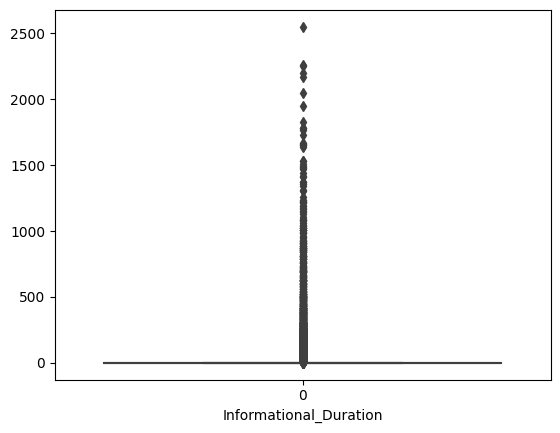

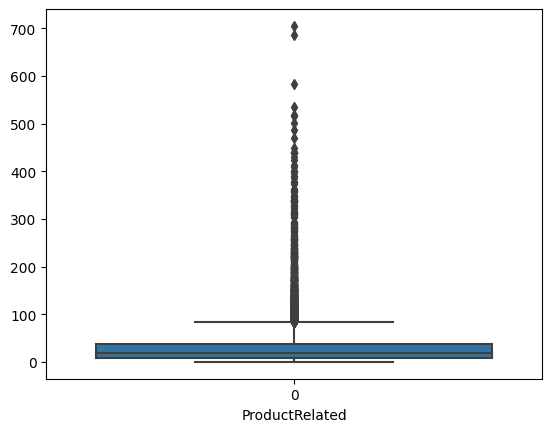

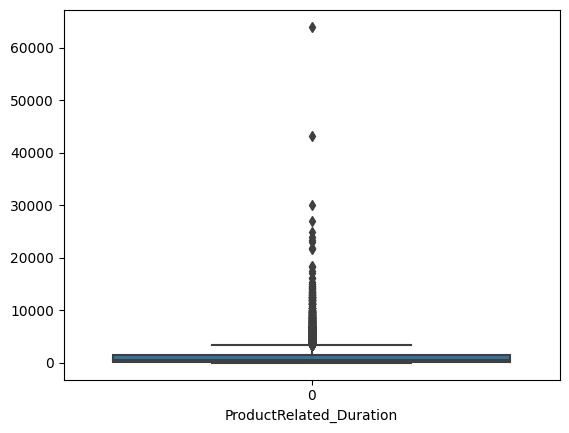

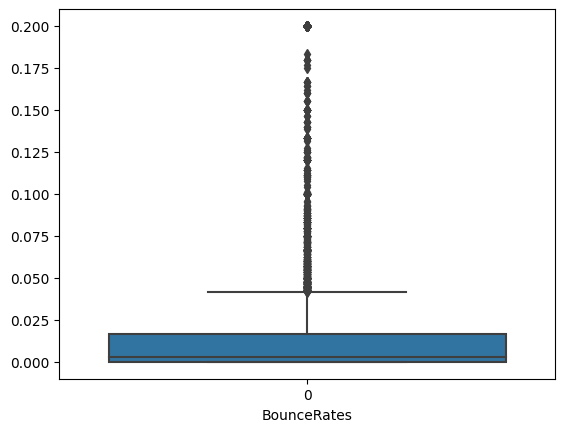

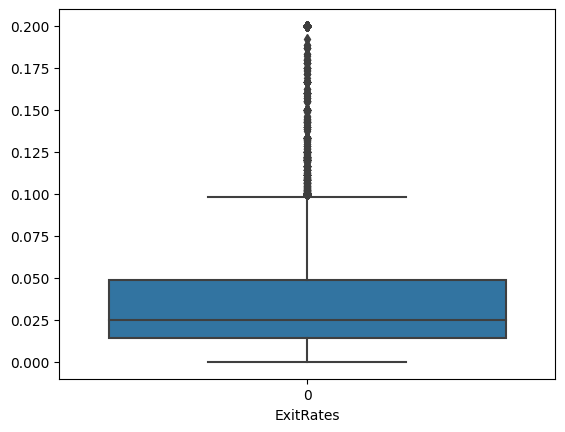

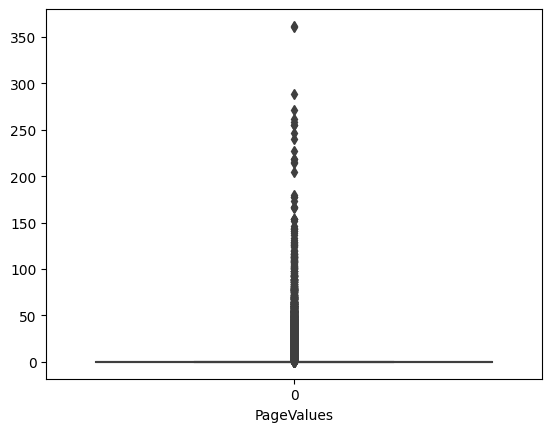

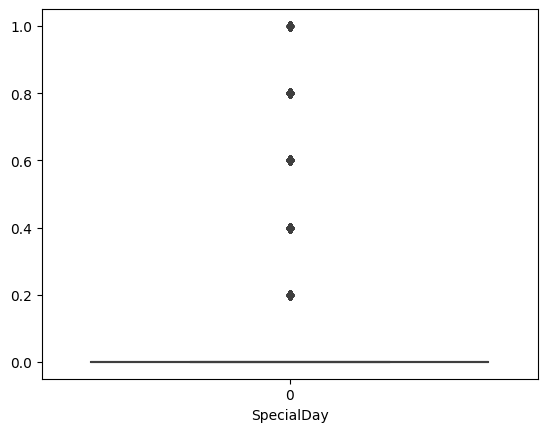

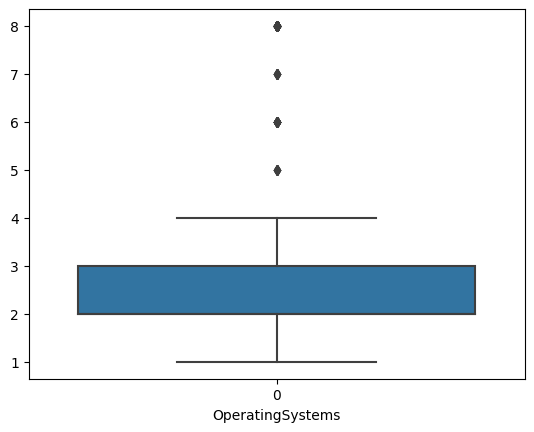

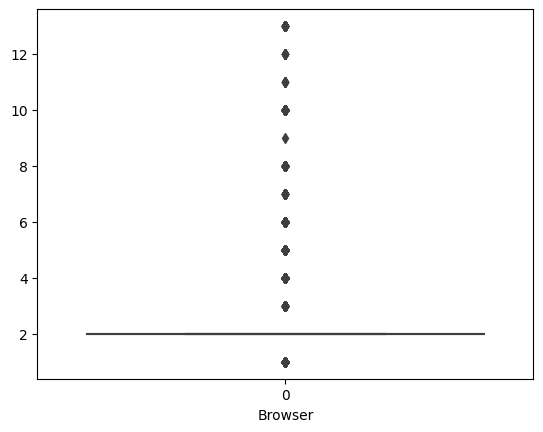

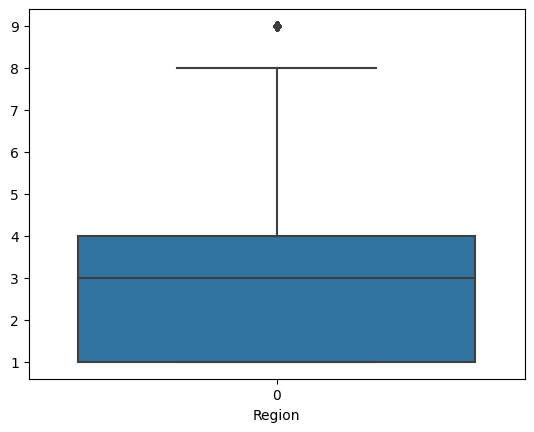

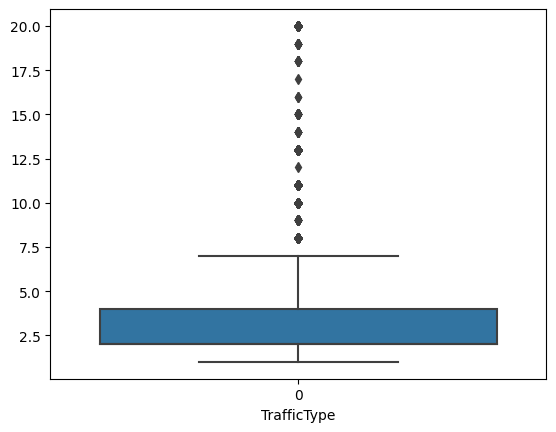

In [11]:
# outliers
for col in df1.columns:
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    plt.show()

In [12]:
from collections import Counter
# Define a function to return a list of the indices
# corresponding to the observations containing more than 2 outliers
def outlier_hunt(df):

    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    return  multiple_outliers


print('The dataset contains %d observations more than 2 outlier' %(len(outlier_hunt(df1))))

The dataset contains 3460 observations more than 2 outlier


In [13]:
df2 = df.loc[outlier_hunt(df1)]
df3 = df2.select_dtypes(exclude=[object, bool])

In [14]:
# Replace outliers with median value
outlier_indices = outlier_hunt(df1)
for col in df3.columns.tolist():
  median_val = df3[col].median()
  df3.loc[df3.index.isin(outlier_indices), col] = median_val

df3.head()

Administrative  Administrative_Duration  Informational  \
62                3                     62.5              1   
282               3                     62.5              1   
288               3                     62.5              1   
478               3                     62.5              1   
502               3                     62.5              1   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
62                     13.0              31              1228.221309   
282                    13.0              31              1228.221309   
288                    13.0              31              1228.221309   
478                    13.0              31              1228.221309   
502                    13.0              31              1228.221309   

     BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
62      0.006828   0.023785         0.0         0.0                 2   
282     0.006828   0.023785         0.0         0.0                 2   
288     0.006828   0.023785         0.0         0.0                 2   
478     0.006828   0.023785         0.0         0.0                 2   
502     0.006828   0.023785         0.0         0.0                 2   

     Browser  Region  TrafficType  
62         2       3            3  
282        2       3            3  
288        2       3            3  
478        2       3            3  
502        2       3            3

In [15]:
df3.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [16]:
df_copy.loc[df3.index,['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]=df3[['Administrative',
       'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']].values

**Data Standarization & Preprocessing**

In [17]:
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0             3.0                     62.5            1.0   
1             0.0                      0.0            0.0   
2             3.0                     62.5            1.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    13.0            31.0              1228.221309   
1                     0.0             2.0                64.000000   
2                    13.0            31.0              1228.221309   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.006828   0.023785         0.0         0.0   Feb               2.0   
1     0.000000   0.100000         0.0         0.0   Feb               2.0   
2     0.006828   0.023785         0.0         0.0   Feb               2.0   
3     0.050000   0.140000         0.0         0.0   Feb               3.0   
4     0.020000   0.050000         0.0         0.0   Feb               3.0   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0      2.0     3.0          3.0  Returning_Visitor    False    False  
1      2.0     1.0          2.0  Returning_Visitor    False    False  
2      2.0     3.0          3.0  Returning_Visitor    False    False  
3      2.0     2.0          4.0  Returning_Visitor    False    False  
4      3.0     1.0          4.0  Returning_Visitor     True    False

In [18]:
# Convert string to int
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_copy['Month']=le.fit_transform(df_copy['Month'])
df_copy['VisitorType']=le.fit_transform(df_copy['VisitorType'])
df_copy['Weekend']=le.fit_transform(df_copy['Weekend'])
df_copy['Revenue']=le.fit_transform(df_copy['Revenue'])
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0             3.0                     62.5            1.0   
1             0.0                      0.0            0.0   
2             3.0                     62.5            1.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    13.0            31.0              1228.221309   
1                     0.0             2.0                64.000000   
2                    13.0            31.0              1228.221309   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     0.006828   0.023785         0.0         0.0      2               2.0   
1     0.000000   0.100000         0.0         0.0      2               2.0   
2     0.006828   0.023785         0.0         0.0      2               2.0   
3     0.050000   0.140000         0.0         0.0      2               3.0   
4     0.020000   0.050000         0.0         0.0      2               3.0   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0      2.0     3.0          3.0            2        0        0  
1      2.0     1.0          2.0            2        0        0  
2      2.0     3.0          3.0            2        0        0  
3      2.0     2.0          4.0            2        0        0  
4      3.0     1.0          4.0            2        1        0

In [19]:
# Split X and y
X = df_copy.drop('Revenue', axis = 1)
y = df_copy['Revenue']

# Standarize X
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X=sd.fit_transform(X)
print("Shape of X: ", X.shape)

Shape of X:  (12205, 17)


In [20]:
y.value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

Imbalanced datasets can indeed pose a challenge when training machine learning models, and it's a good practice to address this issue. The class imbalance can lead the model to be biased towards the majority class, making it less effective in predicting the minority class.

With a significant class imbalance (10297 instances of class 0 and 1908 instances of class 1), it would be better to address the imbalance.





**Oversampling the Minority Class**

This involves creating duplicate copies of instances from the minority class to balance the class distribution. I will use techniques called **random oversampling** to generate synthetic instances.

In [21]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
X_oversample,y_oversample = os.fit_resample(X,y)
print(X_oversample.shape)
print(y_oversample.shape)

(20594, 17)
(20594,)


In [22]:
y_oversample.value_counts()

0    10297
1    10297
Name: Revenue, dtype: int64

**Split the dataset into train and test dataset by 80:20**

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16475, 17)
(16475,)
(4119, 17)
(4119,)


**a. Logistic Regression**

In [25]:
class LogisticRegression():
    """
    Class for logisttic regression
    """

    def __init__(self, lr=0.001, epochs=1000):
        """
        Logistic Regression Constructor

        Args:
            lr (float, optional): _description_. Defaults to 0.001.
            epochs (int, optional): _description_. Defaults to 1000.
        """
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def loss_function(self,x):
        """
        Sigmoid loss function

        Args:
            x (_type_): Z value(mx+b)

        Returns:
            _type_: Probability
        """
        return 1/(1+np.exp(-x))

    def fit(self, X, y):
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Response variable
        """
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0

        for _ in range(self.epochs):
            linear_pred = np.dot(X, self.w) + self.b
            pred = self.loss_function(linear_pred)

            dw = (1/n) * np.dot(X.T, (pred - y))
            db = (1/n) * np.sum(pred-y)

            self.w = self.w - self.lr*dw
            self.b = self.b - self.lr*db

    def predict(self, X):
        """
        Predict the Y

        Args:
            X (_type_): _description_

        Returns:
            _type_: Y-hat probability
        """
        linear_pred = np.dot(X, self.w) + self.b
        y_pred = self.loss_function(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

    def cross_validate(self, X, y, n_splits=10):
        """
        Perform cross-validation

        Args:
            X (numpy array): Features
            y (numpy array): Response variable
            n_splits (int, optional): Number of splits for cross-validation. Defaults to 10.

        Returns:
            list: List of accuracy scores for each fold
        """
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append to the lists
            metrics['accuracy'].append(accuracy)
            metrics['precision'].append(precision)
            metrics['recall'].append(recall)
            metrics['f1_score'].append(f1)

        # Calculate mean and standard deviation for each metric
        result = {metric: {'mean': np.mean(values), 'std': np.std(values)} for metric, values in metrics.items()}
        return result

In [29]:
# Fit the model
fit_logitReg = LogisticRegression(lr=0.001)
fit_logitReg.fit(X_train,y_train)
y_pred = fit_logitReg.predict(X_test)

In [30]:
# Accuracy score
def accuracy(y_pred, y_test):
    return round(np.sum(y_pred==y_test)/len(y_test),4)

acc = accuracy(y_pred, y_test)
print(acc)

0.7186


In [31]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("ClassificationReport:\n",classification_report(y_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(y_pred,y_test))
print("Accuracy of Logistic Regression Model:","{:.2f}".format(accuracy_score(y_pred,y_test)))


ClassificationReport:
               precision    recall  f1-score   support

           0       0.55      0.85      0.67      1391
           1       0.89      0.65      0.75      2728

    accuracy                           0.72      4119
   macro avg       0.72      0.75      0.71      4119
weighted avg       0.78      0.72      0.73      4119

ConfusionMatrix:
 [[1178  213]
 [ 946 1782]]
Accuracy of Logistic Regression Model: 0.72


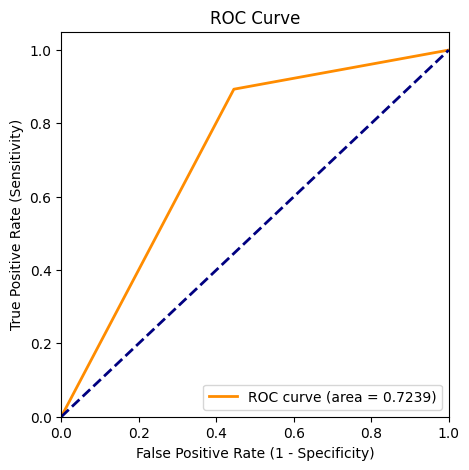

In [32]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

def rocPlot(p):
  fpr, tpr, _ = roc_curve(y_test, p)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=[5, 5])
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.legend(loc="lower right")
  plt.title("ROC Curve")
  plt.show()

rocPlot(y_pred)

In [40]:
# Cross Validation with k = 10
result = fit_logitReg.cross_validate(X_oversample,y_oversample, n_splits=10)
print("Cross-validation results:")
for metric, values in result.items():
    print(f"{metric}: Mean = {values['mean']:.4f}, Std = {values['std']:.4f}")

Cross-validation results:
accuracy: Mean = 0.7094, Std = 0.0083
precision: Mean = 0.6561, Std = 0.0074
recall: Mean = 0.8804, Std = 0.0053
f1_score: Mean = 0.7519, Std = 0.0060


**b. KNeighborsClassifier**

In [23]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total_instances = len(y_true)
    accuracy = correct_predictions / total_instances
    return accuracy

def calculate_precision(y_true, y_pred):
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    false_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)

    if true_positive + false_positive == 0:
        return 0  # Handle the case when the denominator is zero

    precision = true_positive / (true_positive + false_positive)
    return precision

def calculate_recall(y_true, y_pred):
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    false_negative = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)

    if true_positive + false_negative == 0:
        return 0  # Handle the case when the denominator is zero

    recall = true_positive / (true_positive + false_negative)
    return recall

def calculate_f1_score(y_true, y_pred):
    precision_val = calculate_precision(y_true, y_pred)
    recall_val = calculate_recall(y_true, y_pred)

    if precision_val + recall_val == 0:
        return 0  # Handle the case when the denominator is zero

    f1_score_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
    return f1_score_val

def calculate_confusion_matrix(y_true, y_pred):
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    true_negative = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 0)
    false_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    false_negative = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)

    confusion_matrix = [[true_negative, false_positive], [false_negative, true_positive]]
    return confusion_matrix

In [24]:
from abc import ABC,abstractmethod
from typing import Dict, Any
from sklearn.utils import shuffle

class KNN(ABC):
    """
    Base class for KNN implementations
    """

    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K      -> integer specifying number of neighbours to consider
            metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p      -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)
        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)
        # store/initialise input parameters
        self.K       = K
        self.metric  = metric
        self.p       = p
        self.X_train = np.array([])
        self.y_train = np.array([])

    def __del__(self) -> None:
        """
        Destructor function.
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train

    def __minkowski(self, x : np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)

    def __cosine(self, x : np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))))

    def __distances(self, X : np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
            X -> numpy array of points [x]
        Outputs:
            D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)
        # return computed distances
        return D

    @abstractmethod
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass

    def fit(self, X : np.array, y : np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
            X -> numpy array containing the predictor features
            y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)

    def predict(self, X : np.array) -> np.array:
        """
        Public prediction function for the class.
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
            X -> numpy array containing the predictor features
        Outputs:
           y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')
        # compute distances
        D = self.__distances(X)
        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]
        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)
        # return results
        return y_pred

    def get_params(self, deep : bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
            deep -> boolean input parameter
        Outputs:
            Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}

    def feature_importance(self, X: np.array, y: np.array, feature_names: list, n_iterations_feature: int = 5) -> Dict:
        """
        Calculate feature importance using permutation feature importance.
        Inputs:
            X               -> numpy array containing the predictor features
            y               -> numpy array containing the labels associated with each value in X
            feature_names   -> list of feature names
            n_iterations_feature -> number of permutations to perform for each feature
        Outputs:
            Dict -> dictionary of feature names and their corresponding importance scores
        """
        original_accuracy = accuracy_score(y, self.predict(X))

        # Dictionary to store feature names and their importance scores
        feature_importance_dict = {}

        for feature_name, feature_idx in zip(feature_names, range(X.shape[1])):
            feature_importance_scores = []
            for _ in range(n_iterations_feature):
                X_permuted = X.copy()
                X_permuted[:, feature_idx] = shuffle(X_permuted[:, feature_idx])
                accuracy_permuted = accuracy_score(y, self.predict(X_permuted))
                feature_importance_scores.append(original_accuracy - accuracy_permuted)

            # Calculate average importance score over iterations
            avg_importance = np.mean(feature_importance_scores)
            feature_importance_dict[feature_name] = avg_importance

        return feature_importance_dict

    def cross_validate(self, X, y, n_splits=10):
        """
        Perform cross-validation

        Args:
            X (numpy array): Features
            y (numpy array): Response variable
            n_splits (int, optional): Number of splits for cross-validation. Defaults to 10.

        Returns:
            list: List of accuracy scores for each fold
        """
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append to the lists
            metrics['accuracy'].append(accuracy)
            metrics['precision'].append(precision)
            metrics['recall'].append(recall)
            metrics['f1_score'].append(f1)

        # Calculate mean and standard deviation for each metric
        result = {metric: {'mean': np.mean(values), 'std': np.std(values)} for metric, values in metrics.items()}
        return result

In [25]:
from scipy import stats

class KNNClassifier(KNN):
    """
    Class for KNN classifiction implementation
    """

    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K       -> integer specifying number of neighbours to consider
            metric  -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p       -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)

    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
            idx_neighbours -> indices of nearest neighbours
        Outputs:
            y_pred -> numpy array of prediction results
        """
        # compute the mode label for each submitted sample
        y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()
        # return result
        return y_pred

Results for k = 2:
Accuracy: 0.7870842437484826
Precision: 0.8620466321243523
Recall: 0.6671679197994987
F1-score: 0.7521898841480643
Results for k = 3:
Accuracy: 0.8397669337217771
Precision: 0.7991931869116988
Recall: 0.893734335839599
F1-score: 0.8438239469947941
Results for k = 4:
Accuracy: 0.8242291818402525
Precision: 0.8153846153846154
Recall: 0.8235588972431078
F1-score: 0.8194513715710723
Results for k = 5:
Accuracy: 0.8086914299587279
Precision: 0.7458248472505091
Recall: 0.9177944862155388
F1-score: 0.8229213483146068
Results for k = 6:
Accuracy: 0.7977664481670308
Precision: 0.7550482879719052
Recall: 0.8621553884711779
F1-score: 0.8050549964895858
Results for k = 7:
Accuracy: 0.7929109007040543
Precision: 0.738313856427379
Recall: 0.8867167919799499
F1-score: 0.8057390116146664
Results for k = 8:
Accuracy: 0.7819859189123574
Precision: 0.7465168539325843
Recall: 0.8325814536340852
F1-score: 0.7872037914691942
Results for k = 9:
Accuracy: 0.7846564700169945
Precision: 0.733

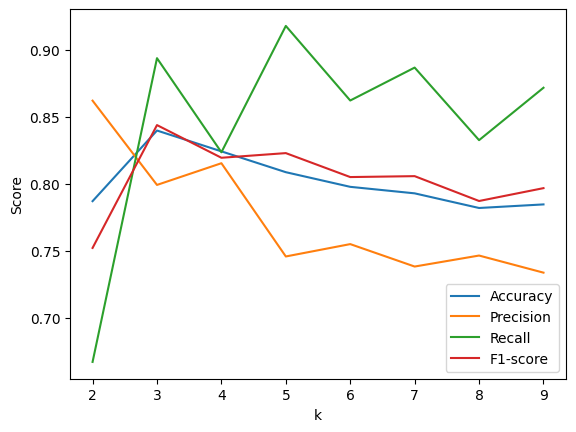

In [33]:
# Choose a range of k values
k_values = [2, 3, 4, 5, 6, 7, 8, 9]
y_true = y_test.values.flatten()

# Store results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate accuracy
accuracy = calculate_accuracy(y_true, y_pred)

# Calculate confusion matrix
conf_matrix = calculate_confusion_matrix(y_true, y_pred)
# Experiment with different k values
for k in k_values:
    knn_model = KNNClassifier(K=k, metric='minkowski', p=2)
    knn_model.fit(X_train, y_train)
    y_pred_val = knn_model.predict(X_test)

    # Calculate metrics for each k
    accuracy = calculate_accuracy(y_true, y_pred_val)
    precision = calculate_precision(y_true, y_pred_val)
    recall = calculate_recall(y_true, y_pred_val)
    f1 = calculate_f1_score(y_true, y_pred_val)

    # Store the scores
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print the scores for each k
    print(f"Results for k = {k}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("=" * 30)

# Plot results
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, f1_scores, label='F1-score')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

In [34]:
# Select the best k value based on the highest accuracy
best_k_accuracy = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Best k based on Accuracy: {best_k_accuracy}")

Best k based on Accuracy: 3


In [36]:
# Fit model with best k: k = 3
knnModel = KNNClassifier(K=3, metric='minkowski', p=2)
knnModel.fit(X_train, y_train)

# Generate predictions on a test dataset
y_pred = knnModel.predict(X_test)

# classification report
print("ClassificationReport:\n",classification_report(y_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(y_pred,y_test))
print("Accuracy of KNN Model:","{:.2f}".format(accuracy_score(y_pred,y_test)))


ClassificationReport:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      1888
           1       0.89      0.80      0.84      2231

    accuracy                           0.84      4119
   macro avg       0.84      0.84      0.84      4119
weighted avg       0.85      0.84      0.84      4119

ConfusionMatrix:
 [[1676  212]
 [ 448 1783]]
Accuracy of KNN Model: 0.84


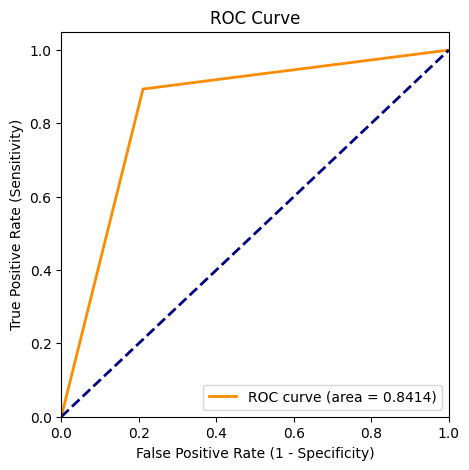

In [37]:
# Plot ROC curve
rocPlot(y_pred)

In [38]:
# Cross Validation with k = 10
result = knnModel.cross_validate(X_oversample,y_oversample, n_splits=10)
print("Cross-validation results:")
for metric, values in result.items():
    print(f"{metric}: Mean = {values['mean']:.4f}, Std = {values['std']:.4f}")

Cross-validation results:
accuracy: Mean = 0.8188, Std = 0.0142
precision: Mean = 0.7839, Std = 0.0210
recall: Mean = 0.8824, Std = 0.0411
f1_score: Mean = 0.8294, Std = 0.0155


**c. SVM**

In [51]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    def cross_validate(self, X, y, n_splits=10):
        """
        Perform cross-validation

        Args:
            X (numpy array): Features
            y (numpy array): Response variable
            n_splits (int, optional): Number of splits for cross-validation. Defaults to 10.

        Returns:
            list: List of accuracy scores for each fold
        """
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append to the lists
            metrics['accuracy'].append(accuracy)
            metrics['precision'].append(precision)
            metrics['recall'].append(recall)
            metrics['f1_score'].append(f1)

        # Calculate mean and standard deviation for each metric
        result = {metric: {'mean': np.mean(values), 'std': np.std(values)} for metric, values in metrics.items()}
        return result

In [52]:
y_train_array = np.where(y_train == 0, -1, 1)
y_test_array = np.where(y_test == 0, -1, 1)

# Reshape y_train and y_test
y_train_array = y_train_array.reshape(-1)
y_test_array = y_test_array.reshape(-1)

In [53]:
# Fit SVM model
svmModel = SVM()
svmModel.fit(X_train, y_train_array)

y_pred_SVM = svmModel.predict(X_test)

In [54]:
# classification report
print("ClassificationReport:\n",classification_report(y_pred_SVM,y_test_array))
print("ConfusionMatrix:\n",confusion_matrix(y_pred_SVM,y_test_array))
print("Accuracy of SVM Model:","{:.2f}".format(accuracy_score(y_pred_SVM,y_test_array)))

ClassificationReport:
               precision    recall  f1-score   support

        -1.0       0.67      0.80      0.73      1734
         1.0       0.83      0.71      0.77      2385

    accuracy                           0.75      4119
   macro avg       0.75      0.76      0.75      4119
weighted avg       0.76      0.75      0.75      4119

ConfusionMatrix:
 [[1394  340]
 [ 692 1693]]
Accuracy of SVM Model: 0.75


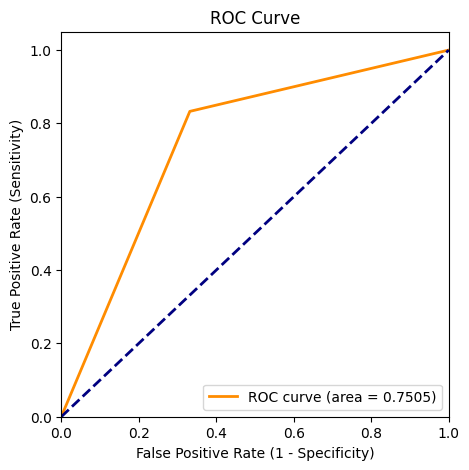

In [55]:
# Plot ROC curve
rocPlot(y_pred_SVM)

In [89]:
# Cross Validation with k = 10
y_oversample_cross = np.where(y_oversample == 0, -1, 1)
y_oversample_cross = y_oversample_cross.reshape(-1)

result = svmModel.cross_validate(X_oversample,y_oversample_cross, n_splits=10)
print("Cross-validation results:")
for metric, values in result.items():
    print(f"{metric}: Mean = {values['mean']:.4f}, Std = {values['std']:.4f}")

Cross-validation results:
accuracy: Mean = 0.5445, Std = 0.0024
precision: Mean = 0.5233, Std = 0.0013
recall: Mean = 0.9972, Std = 0.0014
f1_score: Mean = 0.6864, Std = 0.0011


**d. Random Foreast**

In [70]:
# Define a decision tree node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # Index of the feature to split on
        self.threshold = threshold  # Threshold value for the feature
        self.left = left            # Left subtree (Node)
        self.right = right          # Right subtree (Node)
        self.value = value          # Class label (for leaf nodes)

# Define a basic decision tree classifier
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(set(y)) == 1:
            return Node(value=np.bincount(y).argmax())

        n_features = X.shape[1]
        m, n = X.shape
        best_gini = 1.0
        best_feature, best_threshold = None, None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        if best_gini == 1.0:
            return Node(value=np.bincount(y).argmax())

        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_tree, right=right_tree)

    def _gini_impurity(self, left_labels, right_labels):
        m, n = len(left_labels), len(right_labels)
        total_size = m + n
        gini_left = 1.0 - sum([(np.sum(left_labels == c) / m) ** 2 for c in np.unique(left_labels)])
        gini_right = 1.0 - sum([(np.sum(right_labels == c) / n) ** 2 for c in np.unique(right_labels)])
        gini = (m / total_size) * gini_left + (n / total_size) * gini_right
        return gini

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] < node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)


# Create and fit the Random Forest classifier
class RandomForestClassifier:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_sampled, y_sampled)
            self.models.append(tree)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

    def cross_validate(self, X, y, n_splits=10):
        """
        Perform cross-validation

        Args:
            X (numpy array): Features
            y (numpy array): Response variable
            n_splits (int, optional): Number of splits for cross-validation. Defaults to 10.

        Returns:
            list: List of accuracy scores for each fold
        """
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append to the lists
            metrics['accuracy'].append(accuracy)
            metrics['precision'].append(precision)
            metrics['recall'].append(recall)
            metrics['f1_score'].append(f1)

        # Calculate mean and standard deviation for each metric
        result = {metric: {'mean': np.mean(values), 'std': np.std(values)} for metric, values in metrics.items()}
        return result



In [71]:
# Fit decision tree model
y_train_array = y_train.values
y_test_array = y_test.values
clf = RandomForestClassifier(n_estimators=3, max_depth=2)
clf.fit(X_train, y_train_array)
# Make prediction
y_pred = clf.predict(X_test)

In [67]:
# classification report
print("ClassificationReport:\n",classification_report(y_pred,y_test_array))
print("ConfusionMatrix:\n",confusion_matrix(y_pred,y_test_array))
print("Accuracy of Random Forest Model:","{:.2f}".format(accuracy_score(y_pred,y_test_array)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73      1609
           1       0.87      0.71      0.78      2510

    accuracy                           0.76      4119
   macro avg       0.76      0.77      0.76      4119
weighted avg       0.79      0.76      0.76      4119

ConfusionMatrix:
 [[1351  258]
 [ 735 1775]]
Accuracy of Random Forest Model: 0.76


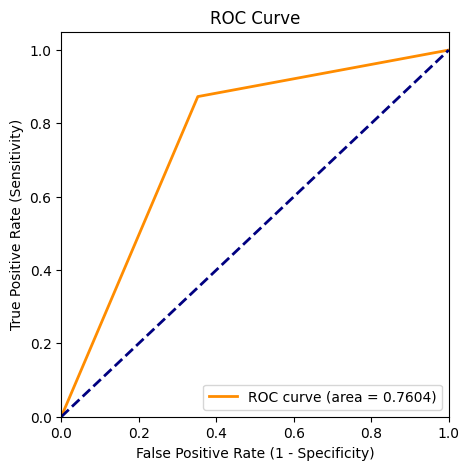

In [68]:
# Plot ROC curve
rocPlot(y_pred)

In [75]:
# Cross Validation with k = 10
y_array = y_oversample.values
result = clf.cross_validate(X_oversample,y_array, n_splits=10)
print("Cross-validation results:")
for metric, values in result.items():
    print(f"{metric}: Mean = {values['mean']:.4f}, Std = {values['std']:.4f}")

Cross-validation results:
accuracy: Mean = 0.7648, Std = 0.0073
precision: Mean = 0.7192, Std = 0.0082
recall: Mean = 0.8693, Std = 0.0080
f1_score: Mean = 0.7871, Std = 0.0059


**e. ADABoost**

In [76]:
class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


class Adaboost:
    def __init__(self,features, n_clf=5):
        self.n_clf = n_clf
        self.clfs = []
        self.features = features

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))
        #print("Initial weight is {}".format(w))
        self.clfs = []

        # Iterate through classifiers
        for i in range(self.n_clf):
            #print(f"No of the iteration {i}")
            clf = DecisionStump()
            min_error = float("inf")

            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                #print(f"Generating the stumps for the feature {self.features[feature_i]}")
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)
                #print(f"Unique values for the feature {self.features[feature_i]} is {len(thresholds)}")
                for threshold in thresholds:#[:5]:
                    #print(f"Feature {self.features[feature_i]}- {threshold}")
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    #print(f"Initial values {predictions}")
                    predictions[X_column < threshold] = -1
                    #print(f"After filter by threadhold {predictions}")

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)
                    #print(f"Total error for Feature {self.features[feature_i]}- {threshold} is {round(error,3)}")
                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)
            #print(f"Polarity:{clf.polarity} - feature {self.features[feature_i]} Threshold {clf.threshold} error {error} alpha {round(clf.alpha,4)}")

            # Save classifier
            self.clfs.append(clf)
            #print(f"Length of the list : {len(self.clfs)}")
            #for l1 in self.clfs:
                #print(f"Polarity:{l1.polarity} - feature {self.features[l1.feature_idx]} Threshold {l1.threshold} weight {round(l1.alpha,4)}")

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred

    def cross_validate(self, X, y, n_splits=10):
        """
        Perform cross-validation

        Args:
            X (numpy array): Features
            y (numpy array): Response variable
            n_splits (int, optional): Number of splits for cross-validation. Defaults to 10.

        Returns:
            list: List of accuracy scores for each fold
        """
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append to the lists
            metrics['accuracy'].append(accuracy)
            metrics['precision'].append(precision)
            metrics['recall'].append(recall)
            metrics['f1_score'].append(f1)

        # Calculate mean and standard deviation for each metric
        result = {metric: {'mean': np.mean(values), 'std': np.std(values)} for metric, values in metrics.items()}
        return result

In [77]:
# Convert y to np.array
y_train_array = y_train.copy()
y_train_array[y_train_array == 0] = -1
y_train_array = y_train_array.values

y_test_array = y_test.copy()
y_test_array[y_test_array == 0] = -1
y_test_array = y_test_array.values

# Extract the feature name
feature_X = df_copy.drop('Revenue', axis = 1)
features = feature_X.columns.tolist()

In [78]:
# Fit the AdaBoost model
ada = Adaboost(features,n_clf=5)
ada.fit(X_train, y_train_array)
y_pred = ada.predict(X_test)

In [ ]:
# classification report
print("ClassificationReport:\n",classification_report(y_pred,y_test_array))
print("ConfusionMatrix:\n",confusion_matrix(y_pred,y_test_array))
print("Accuracy of AdaBoost Model:","{:.2f}".format(accuracy_score(y_pred,y_test_array)))

ClassificationReport:
               precision    recall  f1-score   support

        -1.0       0.88      0.73      0.79      2517
         1.0       0.66      0.84      0.74      1602

    accuracy                           0.77      4119
   macro avg       0.77      0.78      0.77      4119
weighted avg       0.79      0.77      0.77      4119

ConfusionMatrix:
 [[1825  692]
 [ 253 1349]]
Accuracy of AdaBoost Model: 0.77


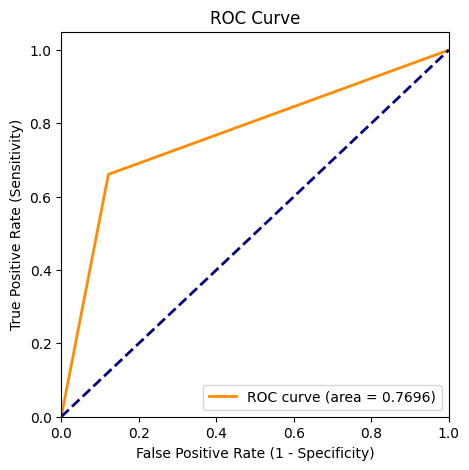

In [ ]:
# Plot ROC curve
rocPlot(y_pred)

In [79]:
# Cross Validation with k = 10
y_oversample_cross = y_oversample.copy()
y_oversample_cross[y_oversample_cross == 0] = -1
y_oversample_cross = y_oversample_cross.values

result = ada.cross_validate(X_oversample,y_oversample_cross, n_splits=10)
print("Cross-validation results:")
for metric, values in result.items():
    print(f"{metric}: Mean = {values['mean']:.4f}, Std = {values['std']:.4f}")

Cross-validation results:
accuracy: Mean = 0.7665, Std = 0.0092
precision: Mean = 0.8428, Std = 0.0093
recall: Mean = 0.6551, Std = 0.0153
f1_score: Mean = 0.7372, Std = 0.0119


**f.Decision Tree**

In [80]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return np.array(preditions, dtype=int)

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def cross_validate(self, X, y, n_splits=10):
        """
        Perform cross-validation

        Args:
            X (numpy array): Features
            y (numpy array): Response variable
            n_splits (int, optional): Number of splits for cross-validation. Defaults to 10.

        Returns:
            list: List of accuracy scores for each fold
        """
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append to the lists
            metrics['accuracy'].append(accuracy)
            metrics['precision'].append(precision)
            metrics['recall'].append(recall)
            metrics['f1_score'].append(f1)

        # Calculate mean and standard deviation for each metric
        result = {metric: {'mean': np.mean(values), 'std': np.std(values)} for metric, values in metrics.items()}
        return result

In [81]:
y_train_array = y_train.values.reshape(-1,1)
y_test_array = y_test.values.reshape(-1,1)

In [82]:
# fit the decision tree model
dt_classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
dt_classifier.fit(X_train,y_train_array)
y_pred = dt_classifier.predict(X_test)

In [ ]:
# classification report
print("ClassificationReport:\n",classification_report(y_pred,y_test_array))
print("ConfusionMatrix:\n",confusion_matrix(y_pred,y_test_array))
print("Accuracy of Decision Tree:","{:.2f}".format(accuracy_score(y_pred,y_test_array)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77      1679
           1       0.88      0.74      0.80      2440

    accuracy                           0.79      4119
   macro avg       0.79      0.80      0.78      4119
weighted avg       0.80      0.79      0.79      4119

ConfusionMatrix:
 [[1438  241]
 [ 640 1800]]
Accuracy of Decision Tree: 0.79


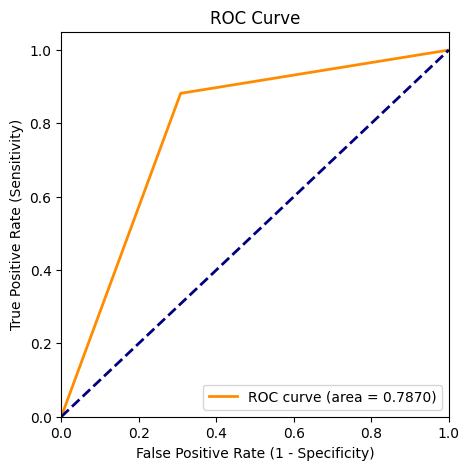

In [ ]:
# Plot ROC curve
rocPlot(y_pred)

In [90]:
# Cross Validation with k = 10
y_oversample_cross = y_oversample.values.reshape(-1,1)

result = dt_classifier.cross_validate(X_oversample,y_oversample_cross, n_splits=10)
print("Cross-validation results:")
for metric, values in result.items():
    print(f"{metric}: Mean = {values['mean']:.4f}, Std = {values['std']:.4f}")

Cross-validation results:
accuracy: Mean = 0.7804, Std = 0.0073
precision: Mean = 0.7293, Std = 0.0070
recall: Mean = 0.8920, Std = 0.0091
f1_score: Mean = 0.8025, Std = 0.0064


**g. Neural Network**

In [84]:
# Reshape Y
y_train_label = y_train.values.reshape(X_train.shape[0], 1)
y_test_label = y_test.values.reshape(X_test.shape[0], 1)
print(y_train_label.shape)
print(y_test_label.shape)


(16475, 1)
(4119, 1)


In [85]:
class NeuralNet():
    '''
    A two layer neural network
    '''

    def __init__(self, layers=[17,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None

    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1])
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2])
        self.params['b2'] = np.random.randn(self.layers[2],)

    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)


    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''

        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)

    def acc(self, y, yhat):
        '''
        Calculates the accuracy between the predicted values and actual
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

    def cross_validate(self, X, y, n_splits=10):
        """
        Perform cross-validation

        Args:
            X (numpy array): Features
            y (numpy array): Response variable
            n_splits (int, optional): Number of splits for cross-validation. Defaults to 10.

        Returns:
            list: List of accuracy scores for each fold
        """
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append to the lists
            metrics['accuracy'].append(accuracy)
            metrics['precision'].append(precision)
            metrics['recall'].append(recall)
            metrics['f1_score'].append(f1)

        # Calculate mean and standard deviation for each metric
        result = {metric: {'mean': np.mean(values), 'std': np.std(values)} for metric, values in metrics.items()}
        return result


In [86]:
# Compare model performance with different numbers of hidden nodes
## Construct multiple neural network model, varying the number of hidden nodes
hidden_nodes_list = [4, 8, 16, 32]

## Train and evaluate each model
for hidden_nodes in hidden_nodes_list:
    model = NeuralNet(layers=[17, hidden_nodes, 1], learning_rate=0.001, iterations=100)
    model.fit(X_train, y_train_label)
    y_pred = model.predict(X_test)
    accuracy = model.acc(y_test_label, y_pred)
    print(f"Hidden Nodes: {hidden_nodes}, Accuracy: {accuracy}%")
    print("ClassificationReport:\n",classification_report(y_pred,y_test_label))
    print("=============================================")

Hidden Nodes: 4, Accuracy: 50%
ClassificationReport:
               precision    recall  f1-score   support

         0.0       1.00      0.51      0.67      4108
         1.0       0.01      1.00      0.01        11

    accuracy                           0.51      4119
   macro avg       0.50      0.75      0.34      4119
weighted avg       1.00      0.51      0.67      4119

Hidden Nodes: 8, Accuracy: 64%
ClassificationReport:
               precision    recall  f1-score   support

         0.0       0.77      0.62      0.68      2583
         1.0       0.52      0.68      0.59      1536

    accuracy                           0.64      4119
   macro avg       0.64      0.65      0.64      4119
weighted avg       0.67      0.64      0.65      4119

Hidden Nodes: 16, Accuracy: 65%
ClassificationReport:
               precision    recall  f1-score   support

         0.0       0.98      0.59      0.74      3447
         1.0       0.31      0.95      0.47       672

    accuracy       

Since hidden nodes = 16 can achieve the highest accuracy, I would use hidden nodes = 16 when training neural network model

In [87]:
# fit the neural network model
nnModel = NeuralNet(layers=[17, 16, 1], learning_rate=0.001, iterations=100)
nnModel.fit(X_train, y_train_label)
y_pred = nnModel.predict(X_test)
accuracy = nnModel.acc(y_test_label, y_pred)
print("Accuracy of Neural Network model is: ", accuracy, "%")
print("ClassificationReport:\n",classification_report(y_pred,y_test_label))

Accuracy of Neural Network model is:  65 %
ClassificationReport:
               precision    recall  f1-score   support

         0.0       0.98      0.59      0.74      3447
         1.0       0.31      0.95      0.47       672

    accuracy                           0.65      4119
   macro avg       0.65      0.77      0.61      4119
weighted avg       0.87      0.65      0.70      4119



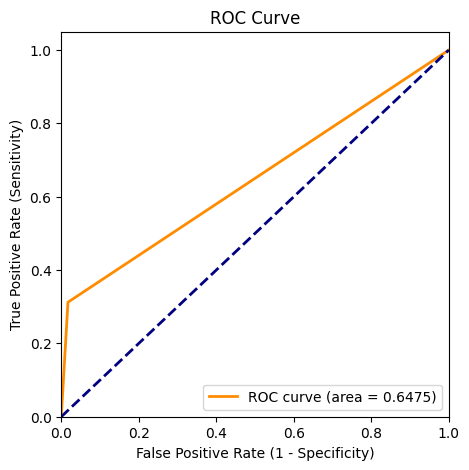

In [ ]:
# Plot ROC curve
rocPlot(y_pred)

In [88]:
# Cross Validation with k = 10
y_oversample_label = y_oversample.values.reshape(X_oversample.shape[0], 1)
result = nnModel.cross_validate(X_oversample,y_oversample_label, n_splits=10)
print("Cross-validation results:")
for metric, values in result.items():
    print(f"{metric}: Mean = {values['mean']:.4f}, Std = {values['std']:.4f}")

Cross-validation results:
accuracy: Mean = 0.6371, Std = 0.0111
precision: Mean = 0.7455, Std = 0.1700
recall: Mean = 0.6139, Std = 0.3097
f1_score: Mean = 0.5896, Std = 0.1240


**Final selection: KNN Classifier**

In [39]:
# Fit model with best k: k = 3
knnModel = KNNClassifier(K=3, metric='minkowski', p=2)
knnModel.fit(X_train, y_train)

# Generate predictions on a test dataset
y_pred = knnModel.predict(X_test)

In [40]:
feature_names = df_copy.drop(columns = ['Revenue']).columns
feature_names = list(feature_names)
feature_names

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

Feature Importance Scores: {'Administrative': 0.06778344258315125, 'Administrative_Duration': 0.02592862345229423, 'Informational': 0.07152221412964313, 'Informational_Duration': 0.012672978878368536, 'ProductRelated': 0.04399126001456666, 'ProductRelated_Duration': 0.040106822044185496, 'BounceRates': 0.043262927895120186, 'ExitRates': 0.030784170915270727, 'PageValues': 0.14110220927409567, 'SpecialDay': 0.008302986161689719, 'Month': 0.08545763534838553, 'OperatingSystems': 0.03194950230638507, 'Browser': 0.022432629278951222, 'Region': 0.044865258557902424, 'TrafficType': 0.032726389900461304, 'VisitorType': 0.047195921340131085, 'Weekend': 0.0282107307598932}


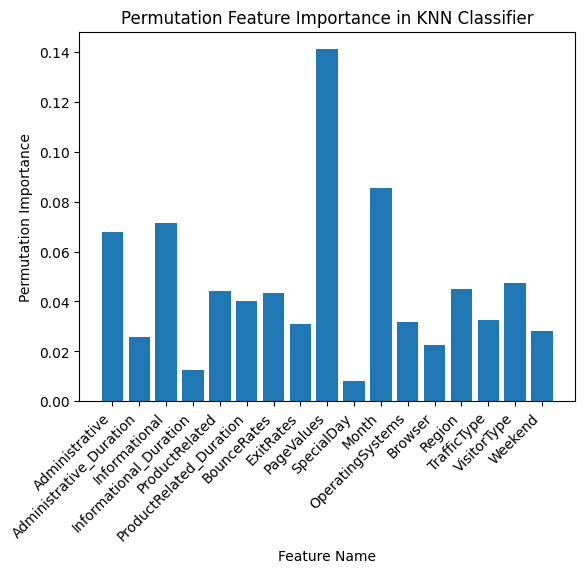

In [41]:
# Feature importance
feature_importance_dict = knnModel.feature_importance(X_test, y_test, feature_names, n_iterations_feature=5)

# Print or visualize feature importance scores
print("Feature Importance Scores:", feature_importance_dict)

# Visualize feature importance
plt.bar(feature_importance_dict.keys(), feature_importance_dict.values())
plt.xlabel('Feature Name')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance in KNN Classifier')
plt.xticks(rotation=45, ha="right")
plt.show()

The most important feature in is "PageValues" indicating a strong positive correlation between the revenue generated by a page and the likelihood of a purchase.

Feature variable “Month” also had significant importance, suggesting that seasonal variations and promotional campaigns such as “Black Friday” can affect the purchase intentions.
